In [370]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [371]:
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'
pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [372]:
def get_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age']).sum()
    
    return data
    



In [373]:
dead_df = get_data(dead_url,dead_query)
dead_df

count
year age       
1968 0     1478
     1       87
     2       63
     3       62
     4       50
...         ...
2020 96    1789
     97    1270
     98    1065
     99     759
     100   1247

[5353 rows x 1 columns]

In [374]:
dead_df.loc['2020'].head(40)

,count
age,
0,268
1,22
2,12
3,6
4,12
5,8
6,7
7,9
8,5


In [375]:
pop_df = get_data(pop_url,pop_query)
pop_df

count
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2020 96    5709
     97    3972
     98    2707
     99    1915
     100   2715

[1919 rows x 1 columns]

In [376]:
dead_df.to_excel('official_deaths.xlsx')
pop_df.to_excel('official_pop.xlsx')

In [377]:
total_dead = dead_df.groupby('year').sum()
total_pop = pop_df.groupby('year').sum()

mortality = (total_dead / total_pop).dropna()
mortality

,count
year,
2002,0.010628
2003,0.010360
2004,0.010049
2005,0.010142
2006,0.010011
2007,0.009998
2008,0.009887
2009,0.009653
2010,0.009618


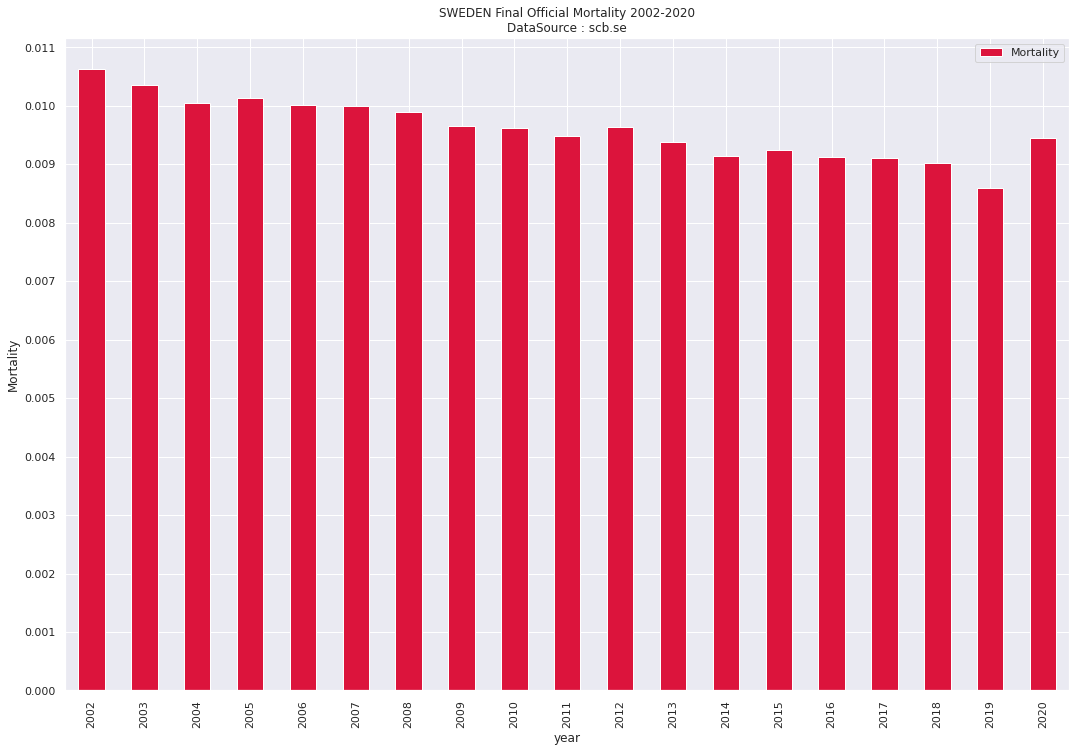

In [378]:
title='SWEDEN Final Official Mortality 2002-2020\nDataSource : scb.se'
mortality.plot(kind='bar',color='crimson',figsize=(18,12),title=title)
plt.legend(['Mortality'])
plt.ylabel('Mortality')
plt.yticks(np.arange(0,0.012,0.001))
plt.savefig('SCB_FINAL_mortality.jpg',format='jpg')

In [379]:
def binner(df,binsize=10):
    
    binned = pd.cut(df.index.get_level_values(1),range(-1,100+binsize,binsize),labels=range(0,100+binsize,binsize))
    return binned

In [380]:
pop_df['bin_10'] = binner(pop_df)
dead_df['bin_10'] = binner(dead_df)

dead_df

count bin_10
year age              
1968 0     1478      0
     1       87      0
     2       63      0
     3       62      0
     4       50      0
...         ...    ...
2020 96    1789     90
     97    1270     90
     98    1065     90
     99     759     90
     100   1247    100

[5353 rows x 2 columns]

In [381]:
binned_pop = pop_df.groupby(['year','bin_10']).sum()
binned_dead = dead_df.groupby(['year','bin_10']).sum()
binned_dead

count
year bin_10       
1968 0        1953
     10        534
     20       1025
     30       1260
     40       2923
...            ...
2020 60       9170
     70      23135
     80      34574
     90      23053
     100      1247

[583 rows x 1 columns]

In [382]:
age_grp_mortality = (binned_dead / binned_pop).dropna()
age_grp_mortality

count
year bin_10          
2002 0       0.000429
     10      0.000208
     20      0.000491
     30      0.000641
     40      0.001578
...               ...
2020 60      0.008279
     70      0.022863
     80      0.076659
     90      0.227549
     100     0.459300

[209 rows x 1 columns]

In [383]:
unstacked_age_grp_mortality = age_grp_mortality.unstack()
unstacked_age_grp_mortality = unstacked_age_grp_mortality.droplevel(0,axis=1)
unstacked_age_grp_mortality

bin_10,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2002,0.000429,0.000208,0.000491,0.000641,0.001578,0.004305,0.010705,0.031648,0.092014,0.239101,0.456255
2003,0.000444,0.000212,0.000478,0.000629,0.001600,0.004160,0.010388,0.030834,0.089277,0.227208,0.470274
2004,0.000426,0.000205,0.000517,0.000594,0.001497,0.004181,0.009971,0.029402,0.085865,0.219046,0.427636
2005,0.000398,0.000180,0.000484,0.000603,0.001438,0.004191,0.009985,0.029105,0.086357,0.225085,0.437801
2006,0.000425,0.000205,0.000464,0.000608,0.001375,0.004034,0.009597,0.028247,0.085737,0.224001,0.446906
2007,0.000383,0.000212,0.000483,0.000584,0.001394,0.003887,0.009558,0.027295,0.086511,0.228231,0.450063
2008,0.000355,0.000210,0.000499,0.000589,0.001339,0.003824,0.009487,0.026354,0.085905,0.227699,0.451270
2009,0.000397,0.000203,0.000454,0.000592,0.001325,0.003766,0.009134,0.025740,0.084310,0.219056,0.443558
2010,0.000370,0.000194,0.000471,0.000539,0.001234,0.003545,0.009279,0.025656,0.083360,0.213476,0.466078


In [384]:
age_grp_baseline = unstacked_age_grp_mortality.loc['2015' : '2018'].mean()
age_grp_baseline

bin_10
0      0.000313
10     0.000161
20     0.000483
30     0.000587
40     0.001126
50     0.002951
60     0.008674
70     0.022051
80     0.075992
90     0.217684
100    0.463904
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


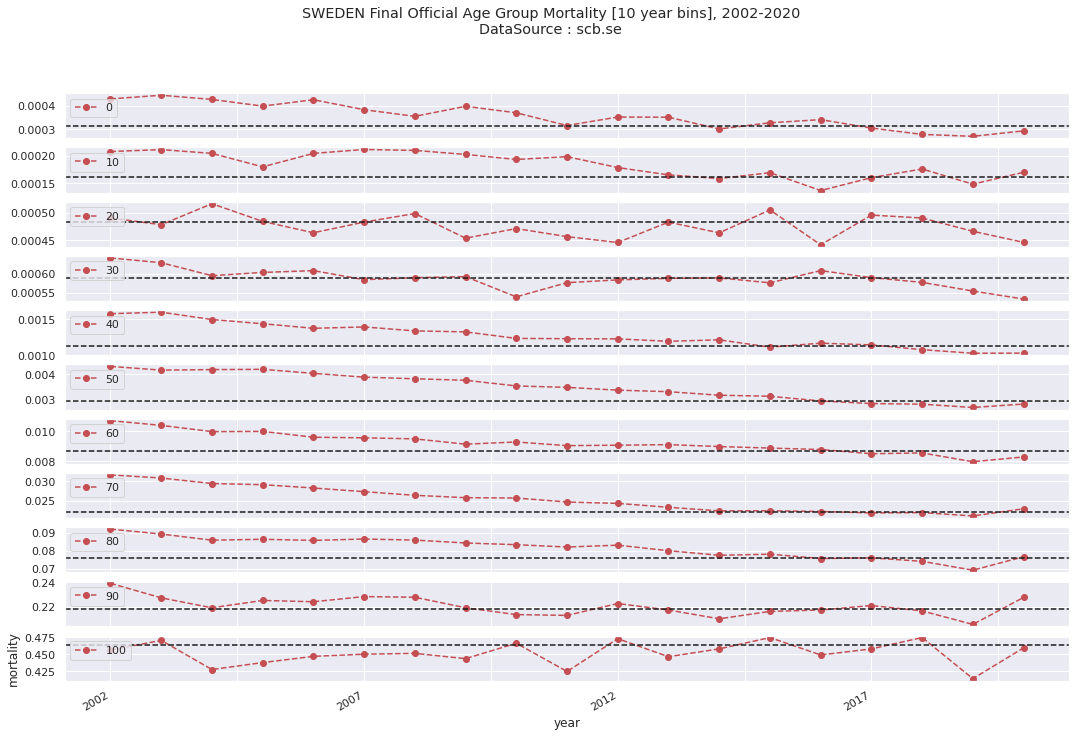

In [385]:
title = 'SWEDEN Final Official Age Group Mortality [10 year bins], 2002-2020\nDataSource : scb.se'
axes = unstacked_age_grp_mortality.plot(subplots=True,figsize=(18,12),style='ro--',title=title)
plt.ylabel('mortality')

for i,ax in enumerate(axes):
    ax.legend(loc='upper left')
    ax.axhline(age_grp_baseline.iloc[i],ls='dashed',color='k')
    
plt.savefig('SCB_FINAL_age_grp_mort.jpg',format='jpg')


In [386]:
age_grp_growth_vs_baseline = unstacked_age_grp_mortality / age_grp_baseline
age_grp_growth_vs_baseline

bin_10,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2002,1.368149,1.293022,1.015090,1.091607,1.401974,1.458469,1.234160,1.435227,1.210831,1.098383,0.983513
2003,1.417173,1.314901,0.989572,1.070157,1.420957,1.409451,1.197639,1.398301,1.174817,1.043750,1.013733
2004,1.360631,1.272263,1.068902,1.012048,1.329857,1.416482,1.149531,1.333375,1.129923,1.006256,0.921821
2005,1.270773,1.120215,1.002117,1.026571,1.277809,1.419827,1.151225,1.319901,1.136397,1.033998,0.943732
2006,1.356792,1.271979,0.959257,1.034673,1.221606,1.366939,1.106453,1.280973,1.128240,1.029016,0.963359
2007,1.222453,1.316512,0.999482,0.993973,1.238141,1.317109,1.101933,1.237819,1.138425,1.048449,0.970165
2008,1.132685,1.305963,1.031758,1.002903,1.189486,1.295530,1.093810,1.195133,1.130447,1.046005,0.972766
2009,1.268045,1.260328,0.938826,1.007716,1.176951,1.275924,1.053052,1.167321,1.109456,1.006301,0.956142
2010,1.180665,1.203730,0.974981,0.916962,1.096642,1.201234,1.069824,1.163504,1.096959,0.980669,1.004688


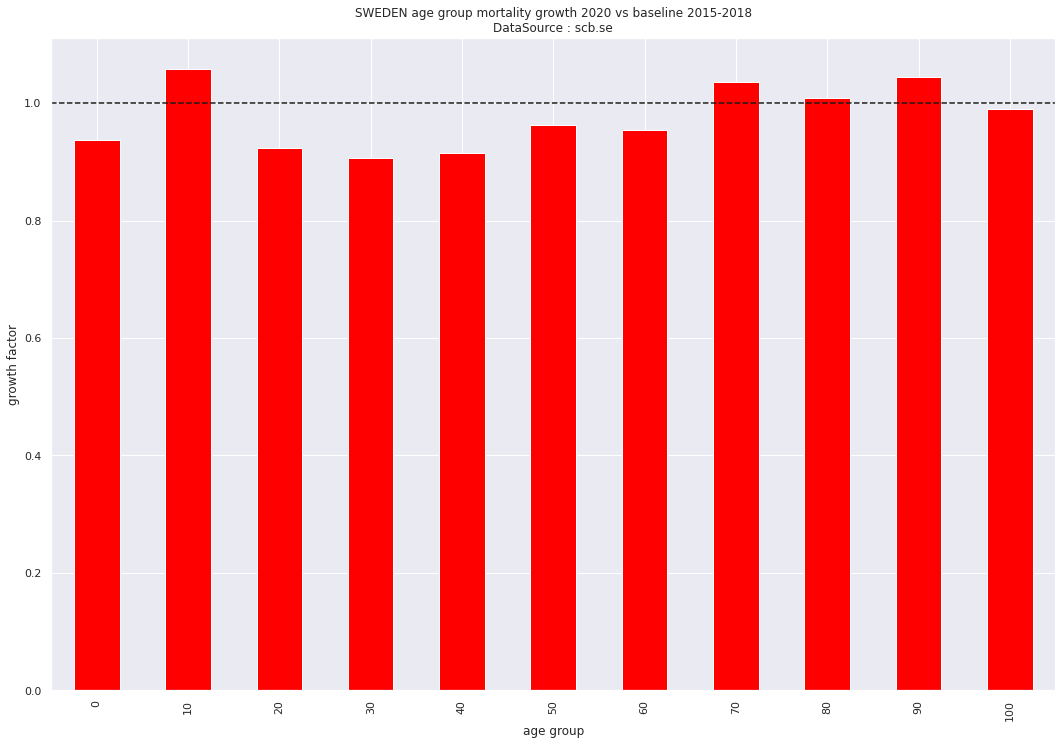

In [387]:
title = 'SWEDEN age group mortality growth 2020 vs baseline 2015-2018\nDataSource : scb.se'
age_grp_growth_vs_baseline.loc['2020'].plot(kind='bar',figsize=(18,12),color='red',title=title)

plt.ylabel('growth factor')
plt.xlabel('age group')
plt.axhline(1,ls='dashed',color='k')

plt.savefig('SCB_FINAL_age_grp_growth.jpg',format='jpg')

In [388]:
binned_dead.loc['2020']

,count
bin_10,
0,352
10,204
20,578
30,745
40,1340
50,3726
60,9170
70,23135
80,34574


In [389]:
pop_df['bin_5'] = binner(pop_df,5)
dead_df['bin_5'] = binner(dead_df,5)
pop_df.tail()

count bin_10 bin_5
year age                    
2020 96    5709     90    95
     97    3972     90    95
     98    2707     90    95
     99    1915     90    95
     100   2715    100   100

In [390]:
binned_5_dead = dead_df.groupby(['year','bin_5']).sum()
binned_5_pop = pop_df.groupby(['year','bin_5']).sum()
binned_5_dead.loc['2020']

,count
bin_5,
0,320
5,32
10,56
15,148
20,246
25,332
30,367
35,378
40,516


In [391]:

binned_5_mort = (binned_5_dead / binned_5_pop).dropna()
binned_5_unstacked = binned_5_mort.unstack().droplevel(0,axis=1)
binned_5_unstacked

bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
year,,,,,,,,,,,,,,,,,,,,,
2002,0.000852,0.000068,0.000108,0.000325,0.000531,0.000454,0.000558,0.000718,0.001207,0.001949,...,0.005313,0.008102,0.013936,0.023445,0.040667,0.070999,0.130200,0.219055,0.334341,0.456255
2003,0.000831,0.000090,0.000103,0.000335,0.000476,0.000481,0.000504,0.000742,0.001207,0.002000,...,0.005036,0.007966,0.013483,0.023178,0.039215,0.069794,0.124975,0.206449,0.325321,0.470274
2004,0.000769,0.000090,0.000104,0.000313,0.000548,0.000486,0.000480,0.000702,0.001088,0.001926,...,0.005096,0.007754,0.012886,0.022239,0.037312,0.067055,0.120301,0.199964,0.306209,0.427636
2005,0.000684,0.000105,0.000104,0.000256,0.000469,0.000499,0.000492,0.000709,0.001077,0.001831,...,0.005133,0.007696,0.013107,0.021692,0.037306,0.068328,0.116462,0.206967,0.304995,0.437801
2006,0.000738,0.000092,0.000093,0.000307,0.000496,0.000432,0.000504,0.000707,0.001056,0.001733,...,0.004927,0.007637,0.012336,0.021066,0.036310,0.066792,0.115367,0.202979,0.315491,0.446906
2007,0.000660,0.000086,0.000083,0.000321,0.000469,0.000497,0.000481,0.000681,0.001046,0.001791,...,0.004775,0.007575,0.012273,0.019866,0.035774,0.065920,0.117803,0.206288,0.321417,0.450063
2008,0.000634,0.000057,0.000114,0.000287,0.000471,0.000527,0.000546,0.000629,0.001067,0.001645,...,0.004680,0.007611,0.011938,0.019359,0.034707,0.064742,0.117191,0.205965,0.318635,0.451270
2009,0.000685,0.000093,0.000115,0.000271,0.000444,0.000465,0.000485,0.000689,0.001034,0.001636,...,0.004610,0.007366,0.011285,0.019233,0.033824,0.062530,0.115909,0.196675,0.312349,0.443558
2010,0.000661,0.000062,0.000090,0.000275,0.000450,0.000494,0.000504,0.000570,0.000920,0.001553,...,0.004423,0.007541,0.011227,0.018852,0.034382,0.061584,0.115375,0.192646,0.306449,0.466078


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


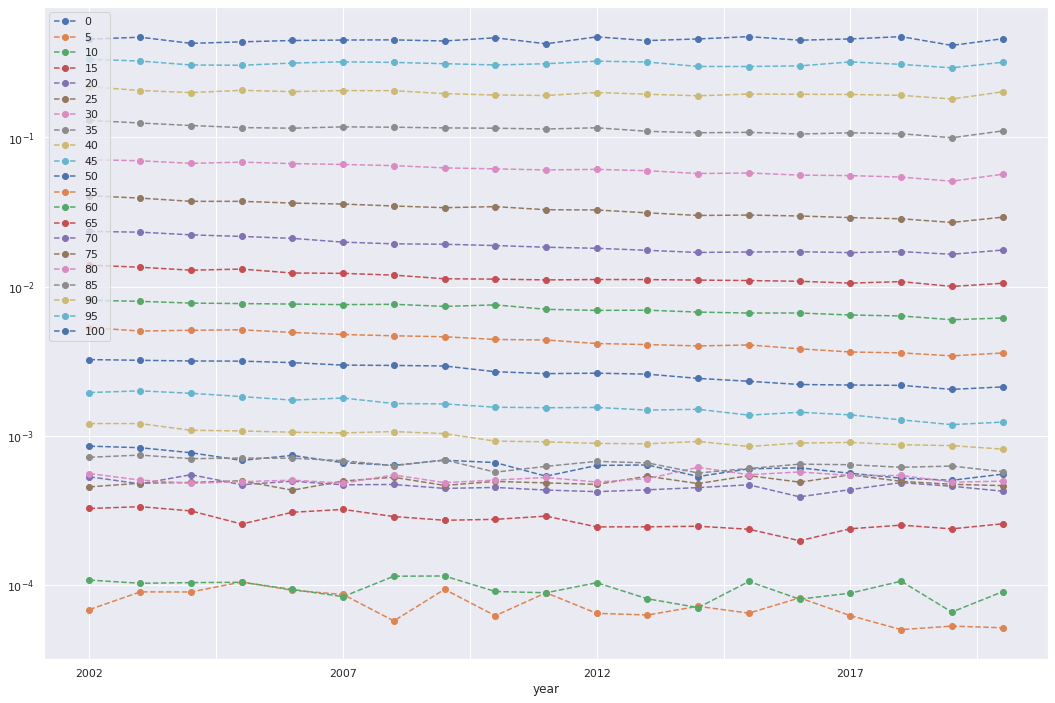

In [392]:
binned_5_unstacked.plot(figsize=(18,12),style='o--',logy=True)
plt.legend(loc='upper left')

In [393]:
binned_5_baseline = binned_5_unstacked.loc['2015' : '2018'].mean()
binned_5_baseline

bin_5
0      0.000572
5      0.000065
10     0.000095
15     0.000231
20     0.000445
25     0.000518
30     0.000551
35     0.000626
40     0.000878
45     0.001367
50     0.002223
55     0.003783
60     0.006527
65     0.010800
70     0.017067
75     0.029363
80     0.055867
85     0.106791
90     0.194078
95     0.307856
100    0.463904
dtype: float64

In [394]:
binned_5_growth = binned_5_unstacked.loc['2020'] / binned_5_baseline
binned_5_growth

bin_5
0      0.966002
5      0.796965
10     0.948282
15     1.112809
20     0.955717
25     0.894823
30     0.901161
35     0.917207
40     0.926187
45     0.903003
50     0.956629
55     0.948616
60     0.943686
65     0.974617
70     1.030320
75     0.994665
80     1.014840
85     1.036080
90     1.042327
95     1.037643
100    0.990077
dtype: float64

Text(0, 0.5, 'growth factor')

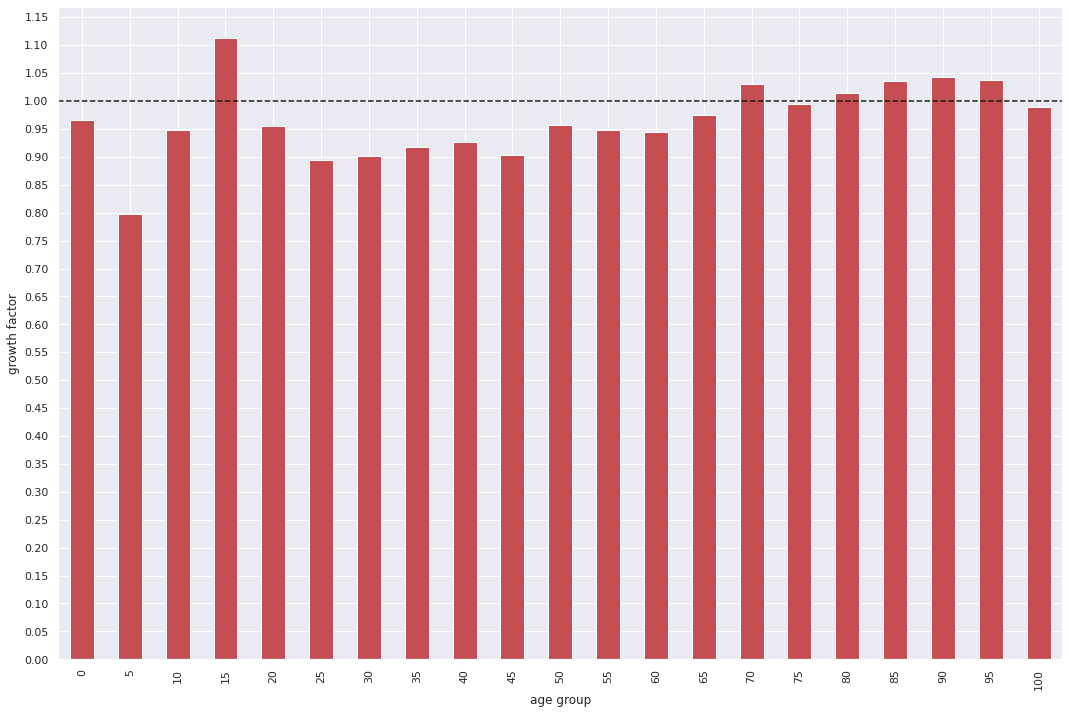

In [395]:
binned_5_growth.plot(kind='bar',figsize=(18,12),color='r')
plt.yticks(np.arange(0,1.2,0.05))
plt.axhline(1,ls='dashed',color='k')
plt.xlabel('age group')
plt.ylabel('growth factor')

In [396]:
expected_deaths = binned_pop.unstack().droplevel(0,axis=1) * age_grp_baseline
expected_deaths


bin_10,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2002,305.522220,185.611667,524.091389,749.353770,1320.281413,3691.542547,7491.733798,15068.692560,30977.897726,15318.875458,567.354174
2003,300.598394,189.367908,519.416287,748.488649,1330.089501,3673.060410,7835.414548,14840.157525,31282.322296,15713.536988,608.641599
2004,297.655939,191.784186,515.482106,742.059856,1353.528500,3621.648668,8234.659462,14686.044118,31588.874647,16220.523587,637.867530
2005,297.456705,191.927512,516.905950,732.535892,1374.227584,3571.562138,8632.542595,14574.577059,31846.260073,16458.452463,674.979822
2006,302.183491,191.040852,525.406488,723.899954,1396.521763,3526.859098,9012.583784,14592.813114,31979.018367,16824.815042,712.092115
2007,308.396384,189.136109,536.277684,715.311002,1418.255351,3487.182420,9358.103373,14684.699016,31931.827239,17124.348559,733.895587
2008,316.063119,186.069635,551.485661,710.936063,1434.233315,3448.780780,9657.070844,14842.693373,32025.373581,17325.924166,785.388893
2009,324.121115,182.492109,567.730349,712.502443,1445.259393,3426.535513,9895.998485,15114.955248,31935.474862,17729.293066,813.687016
2010,332.016217,177.780681,585.652138,713.224845,1457.175888,3413.988793,10093.248666,15341.593909,31706.738478,19051.289466,841.057332


In [397]:
expectation = expected_deaths.sum(axis=1)
expectation

year
2002    76200.956721
2003    77041.094106
2004    78090.128598
2005    78871.427795
2006    79787.234069
2007    80487.432724
2008    81284.019431
2009    82148.049601
2010    83713.766414
2011    84929.678375
2012    85798.774393
2013    86815.909511
2014    88190.363876
2015    89419.472931
2016    90916.758599
2017    92168.877645
2018    93614.723340
2019    95512.730395
2020    96856.534190
dtype: float64

In [398]:
excess = (dead_df.groupby('year')['count'].sum() - expectation).dropna()
excess

year
2002    18808.043279
2003    15919.905894
2004    12441.871402
2005    12838.572205
2006    11389.765931
2007    11241.567276
2008    10164.980569
2009     7931.950399
2010     6773.233586
2011     5008.321625
2012     6139.225607
2013     3586.090489
2014      785.636124
2015     1487.527069
2016       65.241401
2017     -196.877645
2018    -1429.723340
2019    -6746.730395
2020     1267.465810
dtype: float64

In [399]:
pop_df['bin_1'] = pop_df.index.get_level_values(1)
dead_df['bin_1'] = dead_df.index.get_level_values(1)

dead_df

count bin_10 bin_5  bin_1
year age                           
1968 0     1478      0     0      0
     1       87      0     0      1
     2       63      0     0      2
     3       62      0     0      3
     4       50      0     0      4
...         ...    ...   ...    ...
2020 96    1789     90    95     96
     97    1270     90    95     97
     98    1065     90    95     98
     99     759     90    95     99
     100   1247    100   100    100

[5353 rows x 4 columns]

In [400]:
dead_df['scb_prel_bin'] = pd.cut(dead_df.index.get_level_values(1),[-1,64,79,89,100],labels=[64,79,89,100])
pop_df['scb_prel_bin'] = pd.cut(pop_df.index.get_level_values(1),[-1,64,79,89,100],labels=[64,79,89,100])


In [401]:
def binned_mort(bin):
    return (dead_df.groupby(['year',bin])['count'].sum() / pop_df.groupby(['year',bin])['count'].sum()).dropna()

binned_mort('bin_5').tail(40)

year  bin_5
2019  10       0.000066
      15       0.000238
      20       0.000459
      25       0.000473
      30       0.000488
      35       0.000626
      40       0.000859
      45       0.001187
      50       0.002046
      55       0.003433
      60       0.005997
      65       0.010030
      70       0.016476
      75       0.026929
      80       0.050880
      85       0.099568
      90       0.181143
      95       0.293144
      100      0.414286
2020  0        0.000553
      5        0.000052
      10       0.000090
      15       0.000257
      20       0.000425
      25       0.000463
      30       0.000496
      35       0.000574
      40       0.000814
      45       0.001235
      50       0.002126
      55       0.003588
      60       0.006160
      65       0.010525
      70       0.017585
      75       0.029206
      80       0.056696
      85       0.110644
      90       0.202293
      95       0.319445
      100      0.459300
Name: count, dtype: float64

In [402]:
def baseline(start_year='2015',end_year='2018',bin='bin_10'):
    tmp = binned_mort(bin)
    base = tmp.loc[start_year : end_year]
    s = base.unstack().mean()
    s.name=bin
    return s


In [403]:
def expectation(base):
    grp_pop = pop_df.groupby(['year',base.name])['count'].sum()
    return base * grp_pop
    

def excess(base,start_year='2015',end_year='2018'):
    return (dead_df.groupby(['year',base.name])['count'].sum() - expectation(base)).dropna()


excess_15_18_bin_1 = excess(baseline('2015','2018','bin_1')).groupby('year').sum()
excess_15_18_bin_5 = excess(baseline('2015','2018','bin_5')).groupby('year').sum()
excess_15_18_bin_10 = excess(baseline('2015','2018','bin_10')).groupby('year').sum()
excess_15_18_bin_scb_prel = excess(baseline('2015','2018','scb_prel_bin')).groupby('year').sum()

print (excess_15_18_bin_1)
print ()
print (excess_15_18_bin_5)
print ()
print (excess_15_18_bin_10)
print ()
print (excess_15_18_bin_scb_prel)

year
2002    19629.848568
2003    16710.901180
2004    13131.949587
2005    13296.980601
2006    11625.369242
2007    11238.780289
2008     9960.950104
2009     7497.315321
2010     6657.584932
2011     4989.562360
2012     6078.002641
2013     3472.468702
2014      616.750468
2015     1366.746430
2016       -5.416605
2017     -210.273875
2018    -1317.375723
2019    -6747.758999
2020     1176.388129
dtype: float64

year
2002    19452.540101
2003    16628.060797
2004    13176.833603
2005    13148.745604
2006    11442.334783
2007    11150.713838
2008     9963.350618
2009     7632.279288
2010     6618.496994
2011     4890.075875
2012     6077.589762
2013     3521.154889
2014      773.301214
2015     1391.664069
2016       26.657192
2017     -174.640710
2018    -1326.940893
2019    -6739.679040
2020     1177.826282
dtype: float64

year
2002    18808.043279
2003    15919.905894
2004    12441.871402
2005    12838.572205
2006    11389.765931
2007    11241.567276
2008    10164.980569
2009    

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


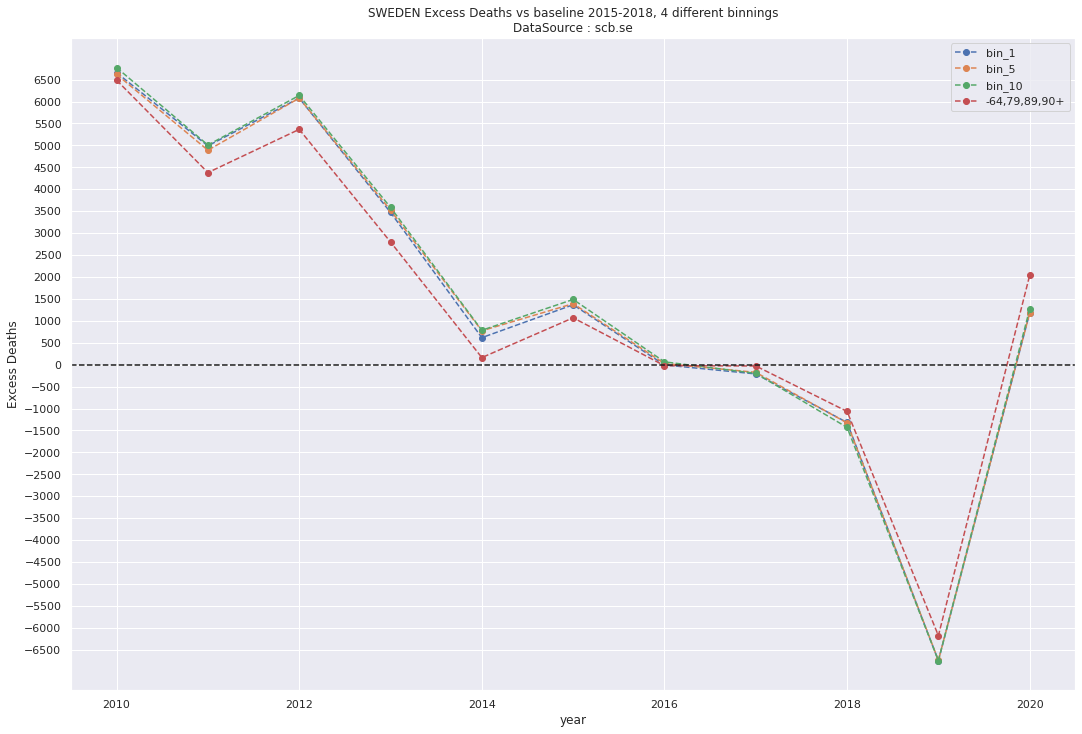

In [404]:
title = 'SWEDEN Excess Deaths vs baseline 2015-2018, 4 different binnings\nDataSource : scb.se'
ax = excess_15_18_bin_1.loc['2010':].plot(figsize=(18,12),style='o--',title=title)
excess_15_18_bin_5.loc['2010':].plot(ax=ax,style='o--')
excess_15_18_bin_10.loc['2010':].plot(ax=ax,style='o--')
excess_15_18_bin_scb_prel.loc['2010':].plot(ax=ax,style='o--')

plt.ylabel('Excess Deaths')
plt.axhline(0,ls='dashed',color='k')
plt.yticks(range(-6500,7000,500))
plt.legend(['bin_1','bin_5','bin_10','-64,79,89,90+'])
plt.savefig('SCB_FINAL_excess_deaths_4_bins.jpg',format='jpg')

bin_1
0      1.012505
1      1.008174
2      0.765228
3      0.629866
4      0.960553
         ...   
96     1.042329
97     0.979273
98     1.116729
99     1.027731
100    0.990077
Length: 101, dtype: float64

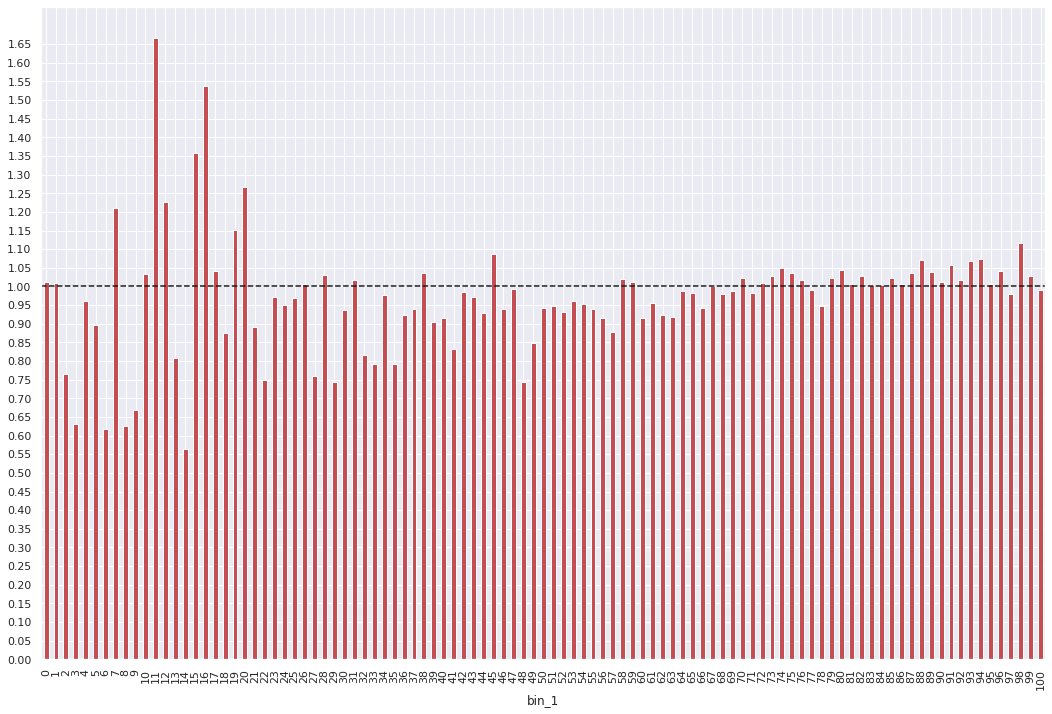

In [405]:
one_bin_mort = (dead_df.groupby(['year','bin_1'])['count'].sum() / pop_df.groupby(['year','bin_1'])['count'].sum()).dropna()
one_bin_growth = one_bin_mort / baseline(bin='bin_1')
one_bin_growth.loc['2020'].plot(kind='bar',figsize=(18,12),color='r')
plt.axhline(1,ls='dashed',color='k')
plt.yticks(np.arange(0,1.7,0.05))
one_bin_growth.loc['2020']

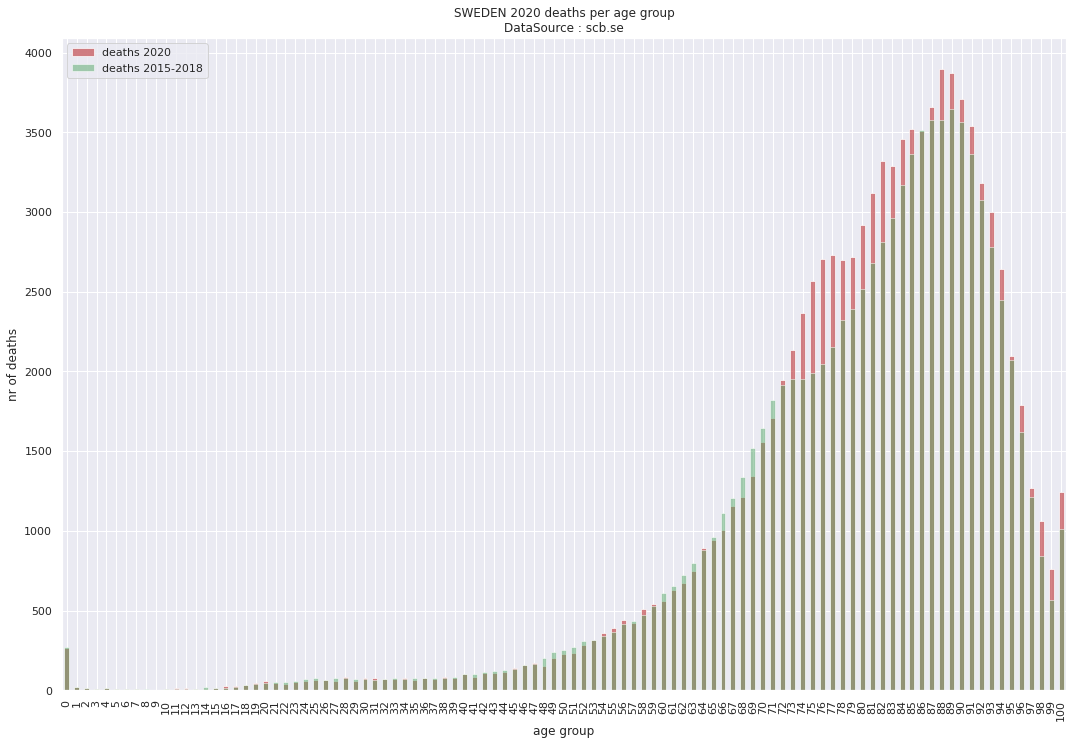

In [406]:
title='SWEDEN 2020 deaths per age group\nDataSource : scb.se'
ax = (dead_df.groupby(['year','bin_1']).sum()).loc['2020'].plot(kind='bar',figsize=(18,12),label='deaths',
                                                           color='r',title=title,alpha=0.7)

(dead_df.groupby(['year','bin_1']).sum().loc['2015' : '2018']).groupby(
    'bin_1').mean().plot(ax=ax,kind='bar',color='g',alpha=0.5)

plt.legend(['deaths 2020','deaths 2015-2018'],loc='upper left')
plt.ylabel('nr of deaths')
plt.xlabel('age group')

plt.savefig('SCB_FINAL_2020_deaths_per_age_grp.jpg',format='jpg')

In [407]:
(dead_df.groupby(['year','bin_1']).sum().loc['2015' : '2018']).groupby('bin_1').mean()


,count
bin_1,
0,271.75
1,22.25
2,15.75
3,9.50
4,12.00
...,...
96,1620.00
97,1214.50
98,843.25


In [408]:
(dead_df.groupby(['year','bin_1']).sum()).loc['2020'].head(40)

,count
bin_1,
0,268
1,22
2,12
3,6
4,12
5,8
6,7
7,9
8,5


In [409]:
growth_old = one_bin_growth.loc['2020'].loc[60:].sort_values()
growth_old

bin_1
60     0.916332
63     0.918085
62     0.924419
66     0.941431
78     0.948112
61     0.955283
68     0.978710
97     0.979273
71     0.981846
65     0.983362
64     0.986617
69     0.989212
77     0.989602
100    0.990077
67     1.000769
83     1.003790
84     1.004636
86     1.005763
95     1.007589
81     1.007990
72     1.008290
90     1.011381
76     1.016659
92     1.018015
79     1.021455
85     1.022861
70     1.023729
99     1.027731
82     1.028212
73     1.029243
75     1.035018
87     1.037167
89     1.039198
96     1.042329
80     1.044509
74     1.048615
91     1.057620
93     1.067479
88     1.070789
94     1.073360
98     1.116729
dtype: float64

<AxesSubplot:xlabel='bin_1'>

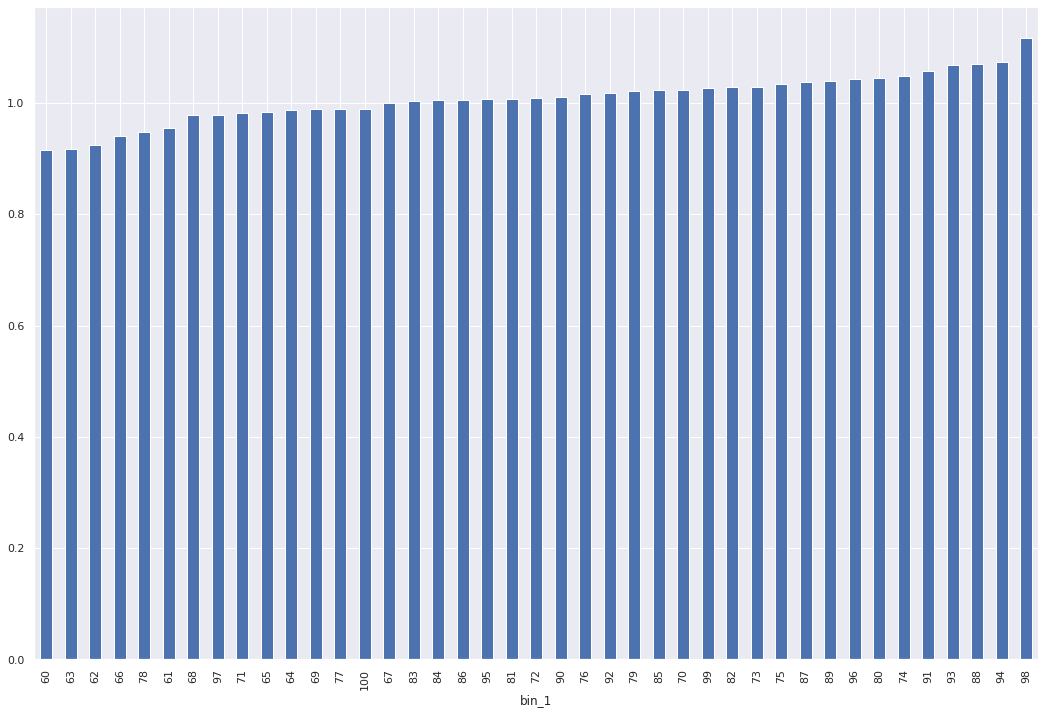

In [410]:
growth_old.plot(style='o',kind='bar',figsize=(18,12))

In [411]:
pop_df

count bin_10 bin_5  bin_1 scb_prel_bin
year age                                        
2002 0    82336      0     0      0           64
     1    92580      0     0      1           64
     2    92138      0     0      2           64
     3    90251      0     0      3           64
     4    91214      0     0      4           64
...         ...    ...   ...    ...          ...
2020 96    5709     90    95     96          100
     97    3972     90    95     97          100
     98    2707     90    95     98          100
     99    1915     90    95     99          100
     100   2715    100   100    100          100

[1919 rows x 5 columns]

In [412]:
### PARAM ###
bin = 'bin_1'

def std_pop_f(bin='bin_1'):
    std_pop = pop_df.groupby(['year',bin])['count'].sum()
    return (std_pop.loc['2019'])

std_pop = std_pop_f(bin)
std_pop

bin_1
0       98939
1      118619
2      119913
3      124566
4      122735
        ...  
96       5530
97       3865
98       2886
99       1999
100      2380
Name: count, Length: 101, dtype: int64

In [413]:
def age_adj_mortality(bin='bin_1'):
    binned_mortality = (dead_df.groupby(['year',bin])['count'].sum() / pop_df.groupby(['year',bin])['count'].sum()).dropna()
    return binned_mortality

In [414]:
bin_mortality = age_adj_mortality(bin)
std_deaths = bin_mortality.unstack() * std_pop
std_deaths

bin_1,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2002,376.116243,30.750227,32.536250,13.802174,13.455720,12.133084,8.893033,8.307727,3.253306,10.776893,...,3887.265090,3488.224852,3176.852043,2821.807356,2340.664938,1847.331887,1365.869042,1084.883212,741.322615,1085.887163
2003,359.146389,36.680238,24.464420,18.842029,13.535257,13.567332,14.617091,7.663184,8.201174,12.342107,...,3659.760277,3364.268233,3058.225420,2507.619133,2235.994479,1805.172517,1310.140312,1068.063202,775.031285,1119.253049
2004,359.370327,24.880382,14.754286,9.326395,10.563415,10.929770,17.403089,6.685631,13.878890,7.273477,...,3620.771547,3153.829890,2874.788430,2606.548058,2100.140198,1649.382609,1266.148677,1005.277635,758.605708,1017.774545
2005,280.219142,48.824449,16.668143,24.173244,10.473387,16.012309,20.248743,9.434799,10.567742,9.148402,...,3640.113402,3324.916359,2957.660933,2608.926502,2084.454011,1595.706609,1321.709845,1004.914498,731.672816,1041.965636
2006,322.019057,34.631599,16.302653,18.409675,13.685744,13.185387,7.858072,9.477294,11.937032,14.971492,...,3825.664427,3302.317295,2883.981453,2534.755526,2113.932407,1770.842697,1248.804924,1035.447761,800.347989,1063.635179
2007,288.006995,36.457023,17.357732,10.806663,13.214751,13.790170,11.662678,7.876931,11.984843,8.201300,...,3651.847319,3356.426061,3064.117677,2699.150168,2174.578459,1772.342390,1341.037879,1076.356056,729.067006,1071.150442
2008,286.322034,26.115549,18.799128,8.333926,11.724444,10.873096,3.693170,1.296829,11.611288,8.219016,...,3645.477854,3328.374589,3042.787347,2517.907725,2223.282756,1655.991592,1302.165864,1049.166392,808.034599,1074.022445
2009,287.559247,38.550211,26.164739,23.915579,5.817762,9.437572,10.687305,16.033866,12.747434,9.295983,...,3495.710807,3207.773800,2905.011083,2668.174482,2166.048038,1601.774662,1242.654045,1077.398601,825.119149,1055.667047
2010,293.430572,29.316304,15.043254,13.516276,13.389638,4.693912,8.137121,11.918421,8.516072,5.261046,...,3471.978197,3209.011654,2856.754986,2547.319011,2153.560976,1654.150273,1225.771936,987.729569,712.342063,1109.266409


In [415]:
age_adj_mortality = std_deaths.sum(axis=1) / std_pop.sum()
age_adj_mortality

year
2002    0.011615
2003    0.011248
2004    0.010801
2005    0.010807
2006    0.010601
2007    0.010538
2008    0.010378
2009    0.010106
2010    0.010001
2011    0.009810
2012    0.009928
2013    0.009643
2014    0.009328
2015    0.009406
2016    0.009256
2017    0.009239
2018    0.009122
2019    0.008602
2020    0.009373
dtype: float64

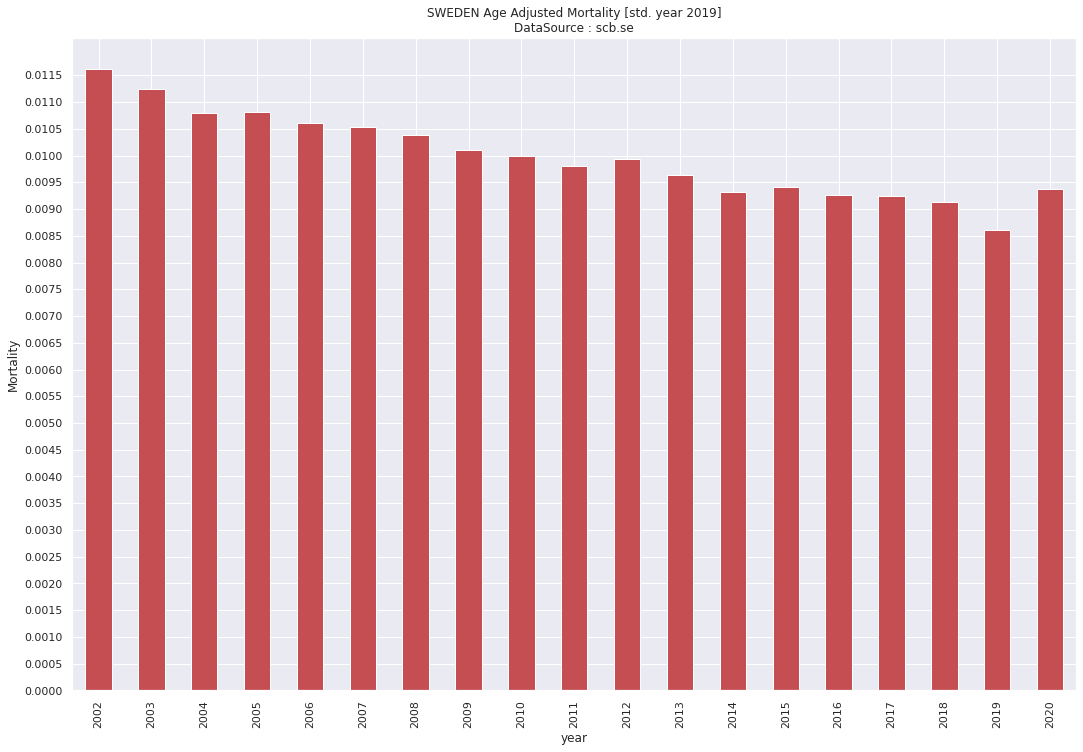

In [416]:
title='SWEDEN Age Adjusted Mortality [std. year 2019]\nDataSource : scb.se'
age_adj_mortality.plot(kind='bar',figsize=(18,12),color='r',title=title)
plt.ylabel('Mortality')
_= plt.yticks(np.arange(0,0.012,0.0005))

plt.savefig('SCB_FINAL_age_adj_mort.jpg',format='jpg')

bin_10
0      0.000294
10     0.000170
20     0.000446
30     0.000533
40     0.001030
50     0.002842
60     0.008279
70     0.022863
80     0.076659
90     0.227549
100    0.459300
Name: count, dtype: float64

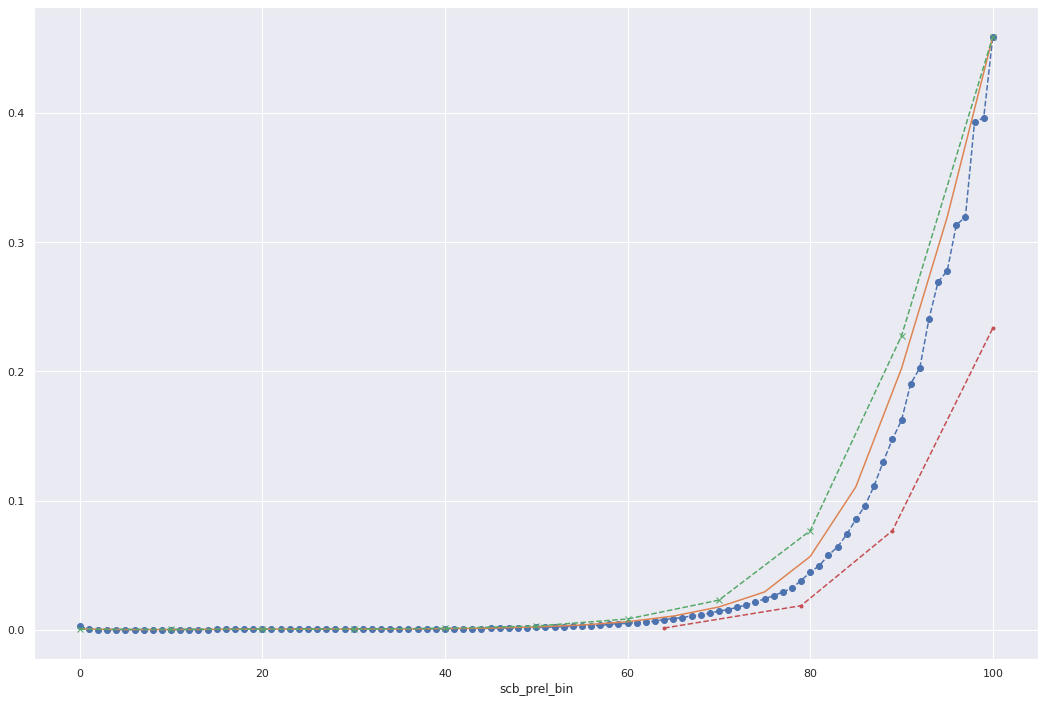

In [417]:
mort_1 = binned_mort('bin_1')
mort_5 = binned_mort('bin_5')
mort_10 = binned_mort('bin_10')
mort_prel = binned_mort('scb_prel_bin')

ax = mort_1.loc['2020'].plot(figsize=(18,12),style='o--')
mort_5.loc['2020'].plot(ax=ax)
mort_10.loc['2020'].plot(ax=ax,style='x--')
mort_prel.loc['2020'].plot(ax=ax,style='.--')
mort_10.loc['2020']

In [418]:
mort_1_baseline = mort_1.unstack().loc['2015' : '2018'].mean()
mort_5_baseline = mort_5.unstack().loc['2015' : '2018'].mean()
mort_1_baseline

bin_1
0      0.002717
1      0.000187
2      0.000131
3      0.000079
4      0.000100
         ...   
96     0.300639
97     0.326506
98     0.352301
99     0.385650
100    0.463904
Length: 101, dtype: float64

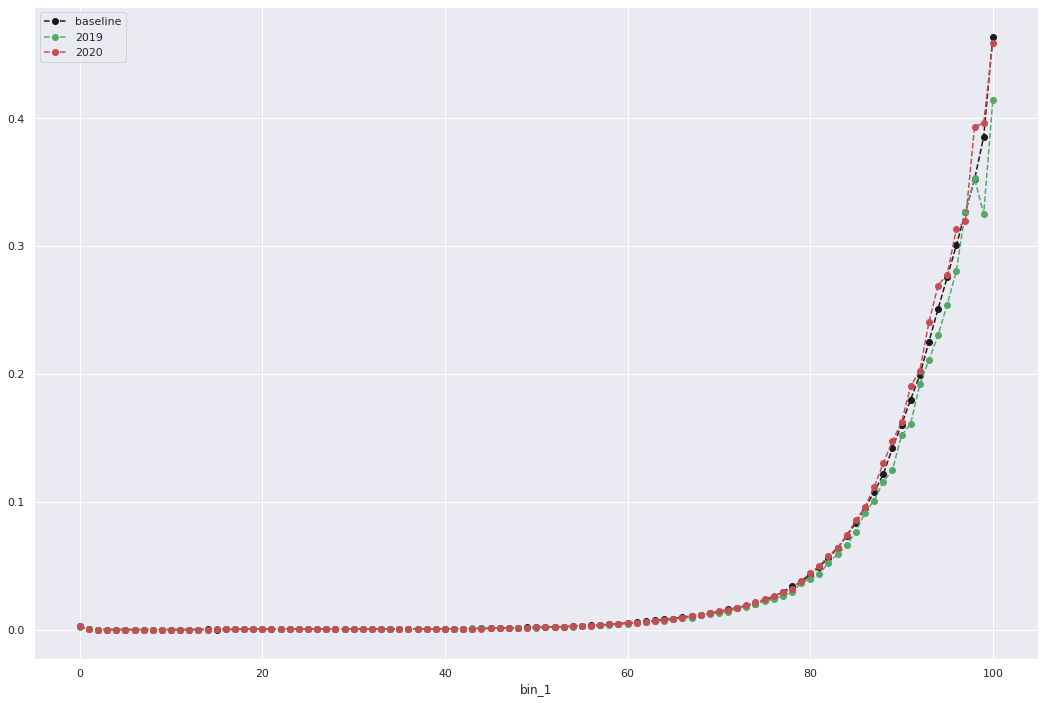

In [419]:
ax = mort_1_baseline.plot(figsize=(18,12),style='ko--',label='baseline')
mort_1.loc['2019'].plot(ax=ax,style='go--',label='2019')
mort_1.loc['2020'].plot(ax=ax,style='ro--',label='2020')
plt.legend(loc='upper left')

In [420]:
mort_1_change = mort_1.loc['2020'] / mort_1.loc['2019']
mort_1_change

bin_1
0      1.148245
1      0.974304
2      2.008711
3      0.443139
4      0.841356
         ...   
96     1.117284
97     0.977680
98     1.114252
99     1.218912
100    1.108656
Name: count, Length: 101, dtype: float64

<AxesSubplot:xlabel='bin_1'>

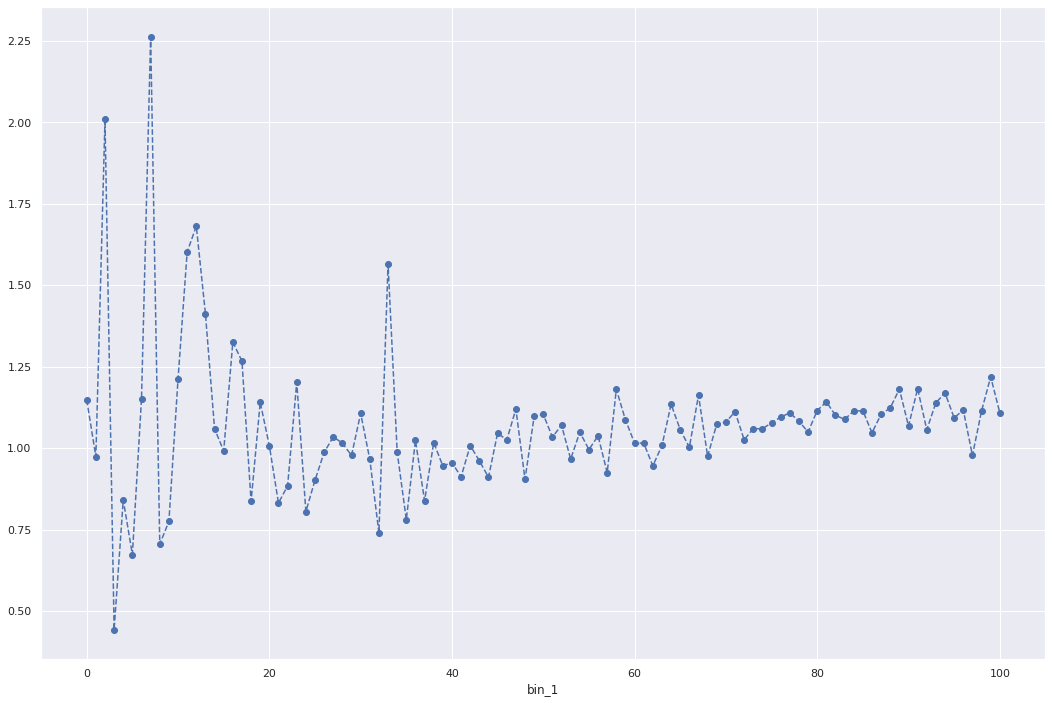

In [421]:
mort_1_change.plot(figsize=(18,12),style='o--')

In [422]:
mort_5_2020_vs_base = mort_5.loc['2020'] / mort_5_baseline
mort_5_2019_vs_base = mort_5.loc['2019'] / mort_5_baseline

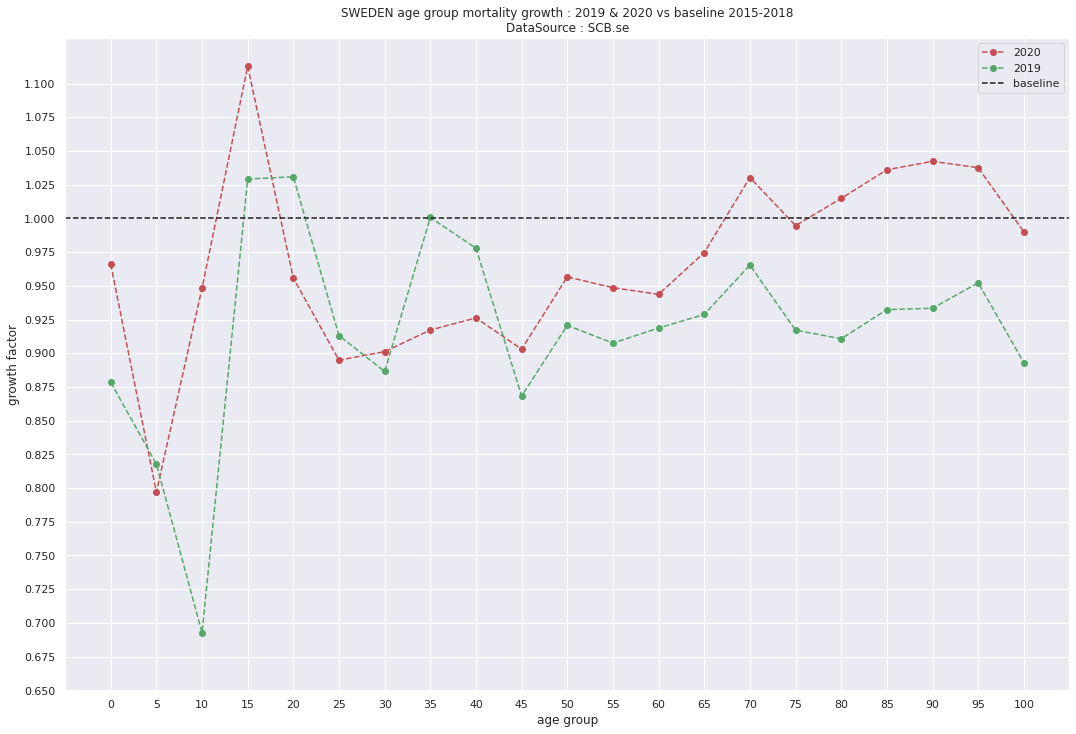

In [423]:
title = 'SWEDEN age group mortality growth : 2019 & 2020 vs baseline 2015-2018\nDataSource : SCB.se'
ax = mort_5_2020_vs_base.plot(figsize=(18,12),style='ro--',label='2020',title=title)
mort_5_2019_vs_base.plot(style='go--',label='2019')
plt.axhline(1,ls='dashed',color='k',label='baseline')
plt.xlabel('age group')
plt.ylabel('growth factor')
plt.yticks(np.arange(0.65,1.12,0.025))
plt.xticks(range(0,105,5))
plt.legend(loc='upper right')
plt.savefig('SCB_FINAL_age_grp_mort_growth.jpg',format='jpg')

In [424]:
(dead_df.groupby(['year','bin_5']).sum()['count']).loc['2020']

bin_5
0        320
5         32
10        56
15       148
20       246
25       332
30       367
35       378
40       516
45       824
50      1422
55      2304
60      3510
65      5660
70      9713
75     13422
80     16108
85     18466
90     16076
95      6977
100     1247
Name: count, dtype: int64

In [425]:
pop_5_flat = pop_df.groupby(['year','bin_5'])['count'].sum().unstack()
pop_5_flat

bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
year,,,,,,,,,,,,,,,,,,,,,
2002,448519,526779,622052,531819,516284,568085,611207,664682,586365,586505,...,642043,478394,385329,357863,325498,262946,144700,58136,12236,1223
2003,458227,501353,624272,552950,519298,555398,608647,665769,596588,584995,...,648960,506768,396578,351716,321281,266311,145341,59579,12606,1312
2004,470540,479647,617890,574353,521574,544982,612331,651139,615783,586622,...,643214,539238,410137,349484,316524,268838,146848,61131,13383,1375
2005,481272,468279,595261,597873,526393,543109,609622,637632,635946,584847,...,631037,574100,421147,347173,313780,262103,156970,61633,13974,1455
2006,497127,467513,568449,619173,540257,546833,601484,631066,656162,584436,...,613407,605612,433450,350048,311732,256692,164128,62849,14441,1535
2007,508968,475505,539518,636263,556434,553149,592124,625802,671368,588537,...,598590,623493,455404,354971,310976,253429,166770,63673,14993,1582
2008,520748,488199,516098,640620,579230,561819,584348,626129,673976,600123,...,586286,630547,482818,366346,306766,251383,170047,64239,15353,1693
2009,531277,503393,496737,637741,604184,570476,579205,633939,662787,621107,...,575699,626157,514754,379756,305703,248776,171471,65687,15758,1754
2010,544610,515263,487179,618010,630992,580749,581028,633346,651959,642521,...,571800,614877,548775,390896,304841,248327,168910,71499,16019,1813


In [426]:
dead_5_flat = dead_df.groupby(['year','bin_5'])['count'].sum().unstack()
dead_5_flat


bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
year,,,,,,,,,,,,,,,,,,,,,
1968,1740,213,159,375,550,475,541,719,1021,1902,...,4397,6217,8818,11842,14025,13725,8847,3519,647,79
1969,1533,207,138,387,505,496,516,659,1109,1942,...,4374,6682,9043,12340,13997,13546,8887,3569,695,50
1970,1463,229,150,393,519,511,504,637,1054,1831,...,4156,6478,8835,11493,13339,12880,8526,3500,707,66
1971,1463,180,180,391,512,503,531,692,1099,1804,...,4185,6576,8991,11989,13968,13326,9055,3641,783,66
1972,1429,209,131,375,494,590,549,646,1007,1789,...,4173,6441,9113,12301,14348,13371,9349,3862,922,96
1973,1269,175,147,346,481,537,578,663,1007,1640,...,4079,6486,9473,12340,14594,13773,10217,4024,888,92
1974,1244,176,143,337,428,509,617,647,1004,1648,...,4056,6456,9455,12538,14779,14005,10046,4233,966,96
1975,1089,184,153,357,467,552,627,705,1020,1673,...,4063,6440,9705,12575,15235,14568,10319,4484,1058,111
1976,983,164,158,336,460,559,667,739,994,1524,...,4291,6507,9709,13032,15525,15163,10954,4953,1119,117


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


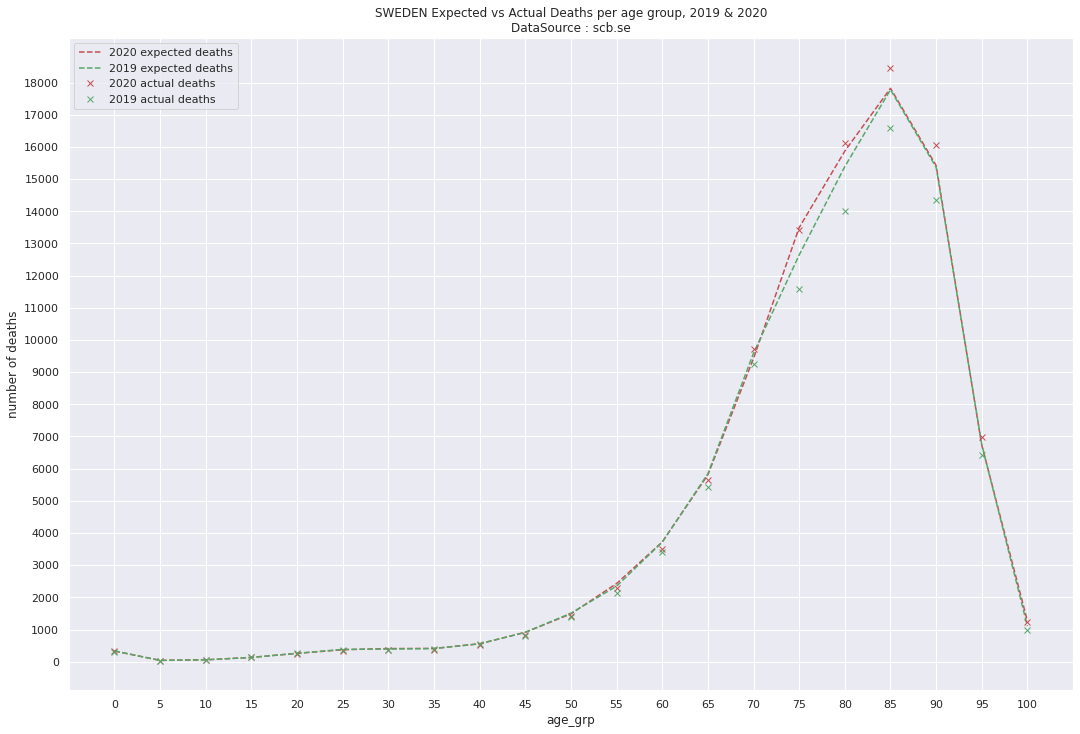

In [427]:
title = 'SWEDEN Expected vs Actual Deaths per age group, 2019 & 2020\nDataSource : scb.se'

expected_5 = pop_5_flat * mort_5_baseline

ax = expected_5.loc['2020'].plot(figsize=(18,12),style='r--',label='2020 expected deaths',title=title)
expected_5.loc['2019'].plot(ax=ax,style='g--',label='2019 expected deaths')

dead_5_flat.loc['2020'].plot(ax=ax,style='rx',label='2020 actual deaths')
dead_5_flat.loc['2019'].plot(ax=ax,style='gx',label='2019 actual deaths')

plt.xticks(range(len(expected_5.loc['2020'])),range(0,105,5))
plt.yticks(range(0,19000,1000))
plt.xlabel('age_grp')
plt.ylabel('number of deaths')
plt.legend(loc='upper left')
plt.savefig('SCB_FINAL_expected_vs_actual_deaths.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'SWEDEN Expected vs Actual Deaths per age group, 2019 & 2020\nDataSource : scb.se'}, xlabel='bin_5'>

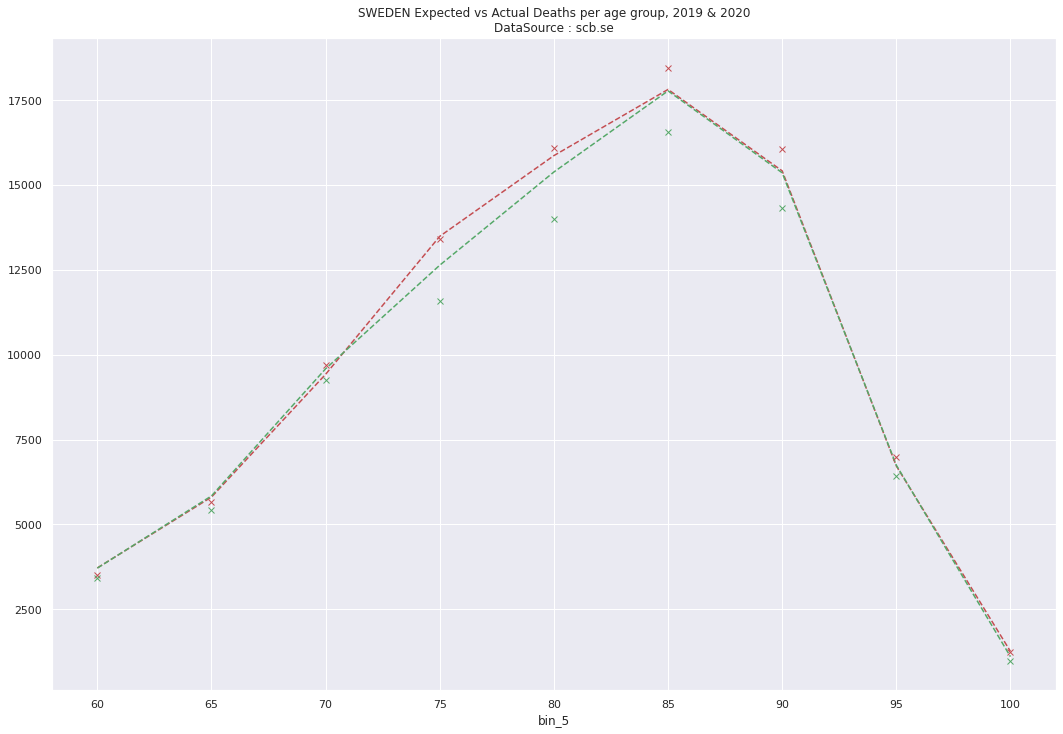

In [428]:

ax = expected_5.loc['2020',60:].plot(figsize=(18,12),style='r--',label='2020 expected deaths',title=title)
expected_5.loc['2019',60:].plot(ax=ax,style='g--',label='2019 expected deaths')

dead_5_flat.loc['2020',60:].plot(ax=ax,style='rx',label='2020 actual deaths')
dead_5_flat.loc['2019',60:].plot(ax=ax,style='gx',label='2019 actual deaths')

<AxesSubplot:xlabel='bin_5'>

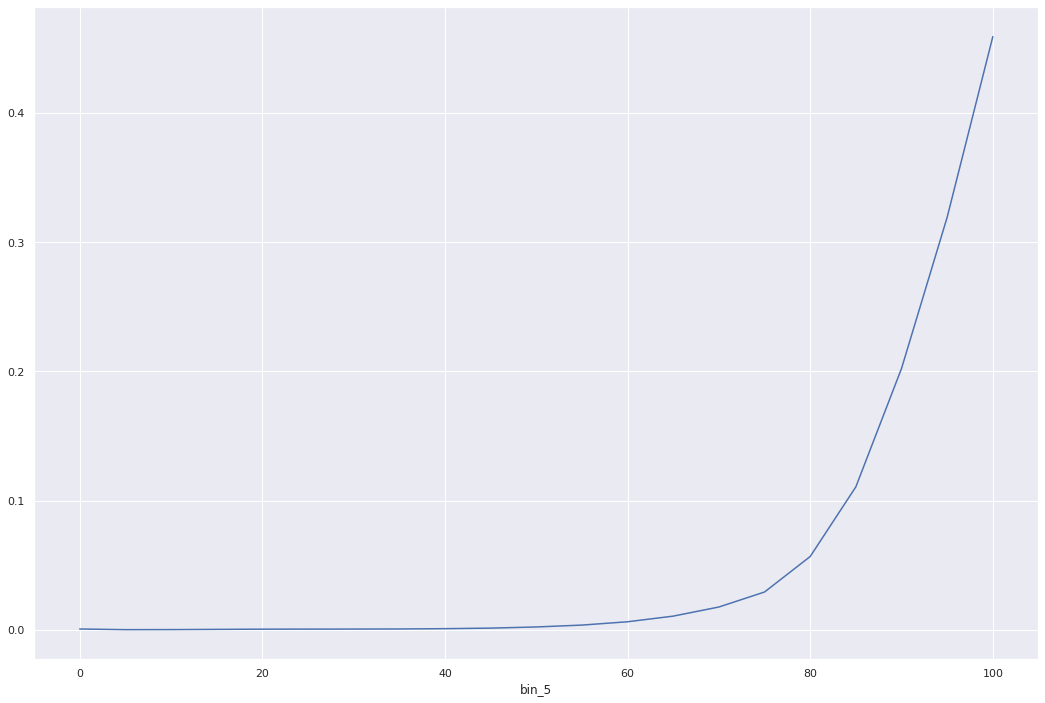

In [429]:
mort_5.loc['2020'].plot(figsize=(18,12))

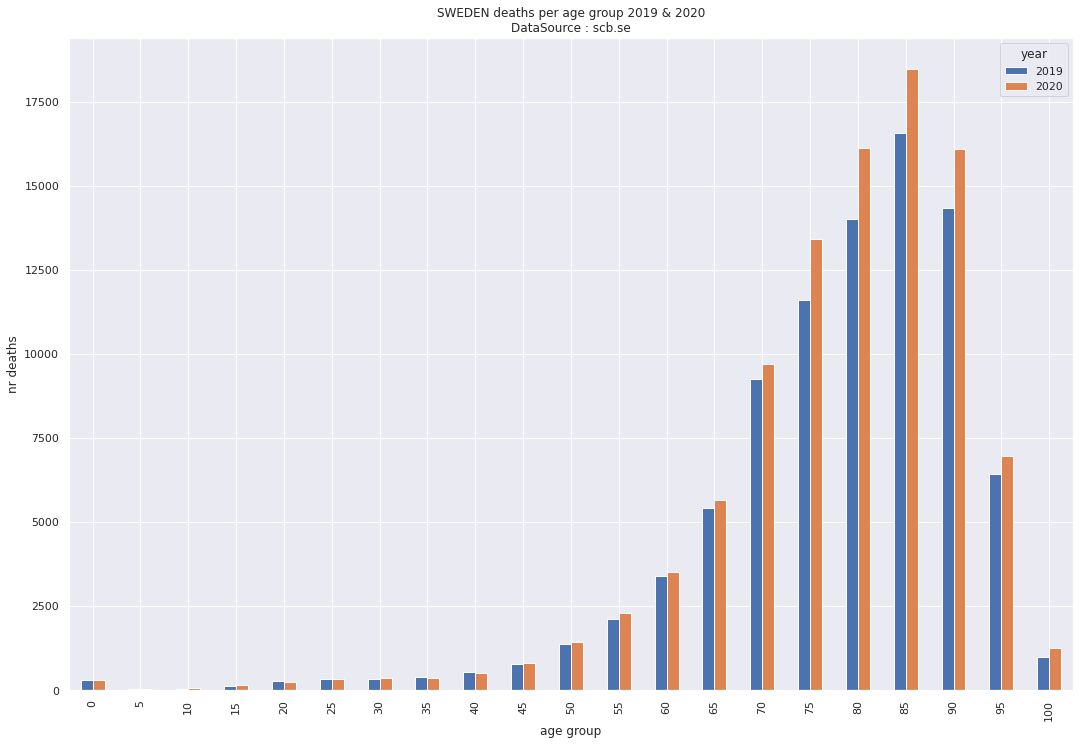

In [430]:
title = 'SWEDEN deaths per age group 2019 & 2020\nDataSource : scb.se'
(dead_df.groupby(['year','bin_5'])['count'].sum()).loc['2019' : '2020'].unstack().T.plot(kind='bar',title=title,
                                                                                        figsize=(18,12))

plt.ylabel('nr deaths')
plt.xlabel('age group')

plt.savefig('SCB_FINAL_nr_deaths_age_grp_2019_2020.jpg',format='jpg')

<AxesSubplot:title={'center':'SWEDEN population per age grp 2019 & 2020\nDataSource : scb.se'}, xlabel='bin_5'>

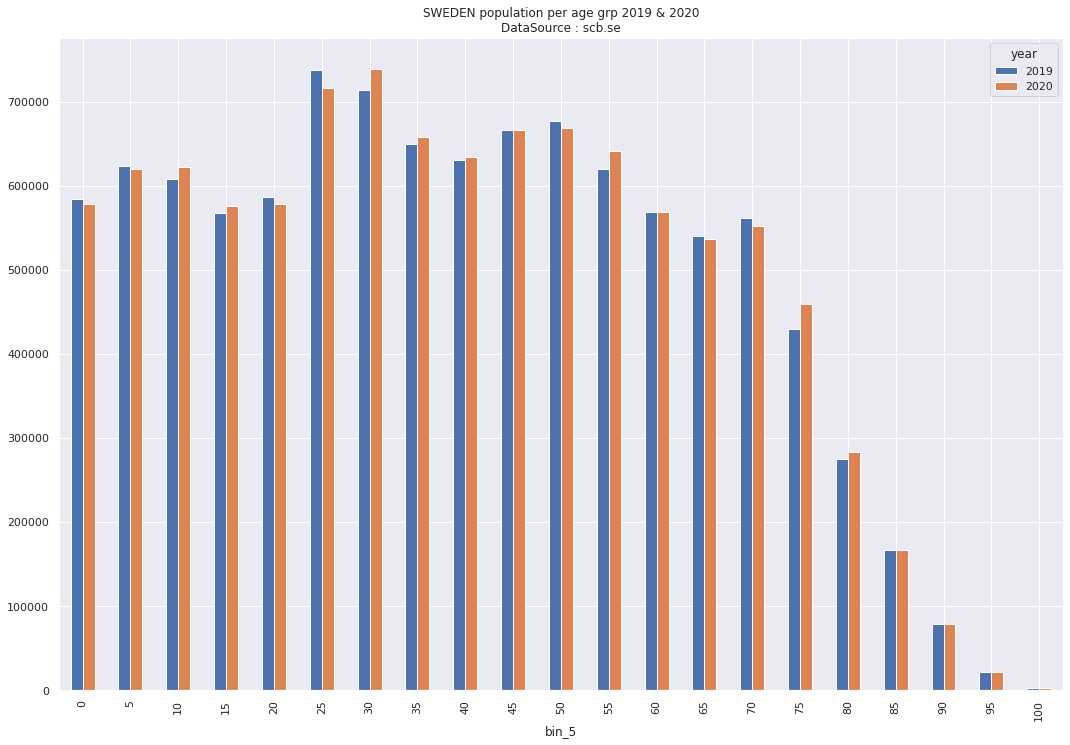

In [431]:
title = 'SWEDEN population per age grp 2019 & 2020\nDataSource : scb.se'
(pop_df.groupby(['year','bin_5'])['count'].sum()).loc['2019' : '2020'].unstack().T.plot(kind='bar',title=title,
                                                                                        figsize=(18,12))


year,2019,2020,baseline_2015_2018,over_base_20,under_base_19
bin_5,,,,,
0,0.000503,0.000553,0.000572,False,True
5,0.000053,0.000052,0.000065,False,True
10,0.000066,0.000090,0.000095,False,True
15,0.000238,0.000257,0.000231,True,False
20,0.000459,0.000425,0.000445,False,False
25,0.000473,0.000463,0.000518,False,True
30,0.000488,0.000496,0.000551,False,True
35,0.000626,0.000574,0.000626,False,False
40,0.000859,0.000814,0.000878,False,True


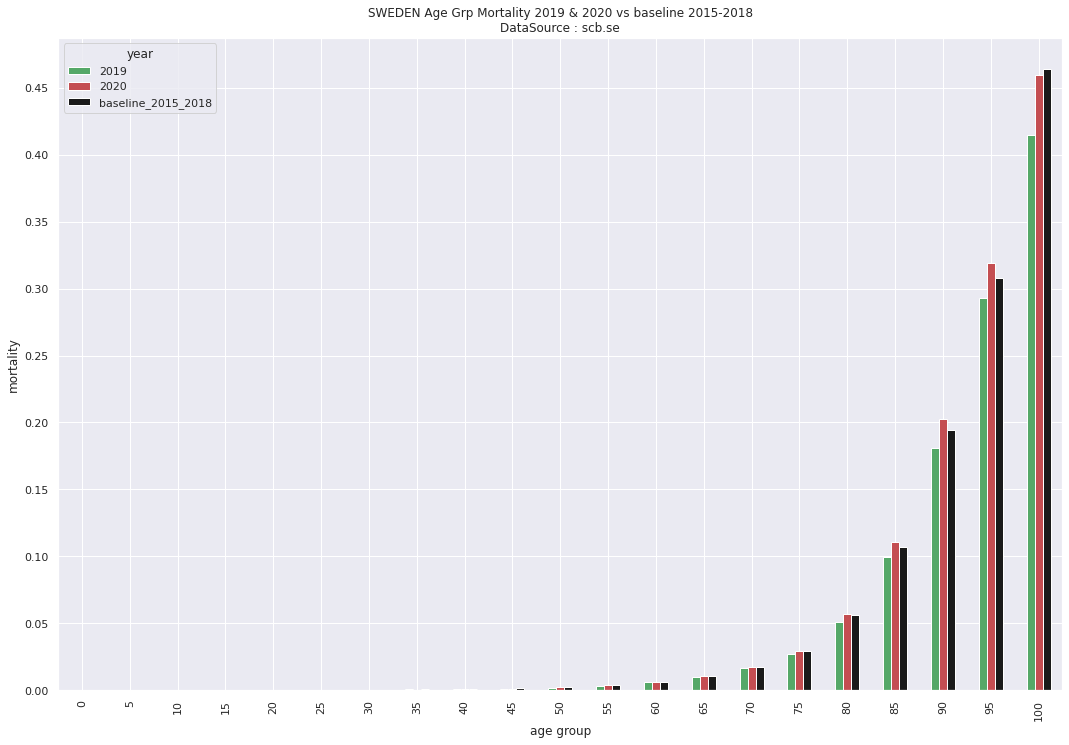

In [432]:
mort_5_cmp = mort_5.loc['2019' : '2020'].unstack().T
mort_5_cmp['baseline_2015_2018'] = mort_5_baseline

title = 'SWEDEN Age Grp Mortality 2019 & 2020 vs baseline 2015-2018\nDataSource : scb.se'

mort_5_cmp.plot(figsize=(18,12),kind='bar',color=['g','r','k'],title=title)
plt.ylabel('mortality')
plt.xlabel('age group')
plt.yticks(np.arange(0,0.5,0.05))
plt.savefig('SCB_FINAL_2020_age_grp_mort_cmp.jpg',format='jpg')

mort_5_cmp['over_base_20'] = mort_5_cmp['2020'] > mort_5_cmp['baseline_2015_2018']
mort_5_cmp['under_base_19'] = mort_5_cmp['2019'] < mort_5_cmp['baseline_2015_2018']
mort_5_cmp

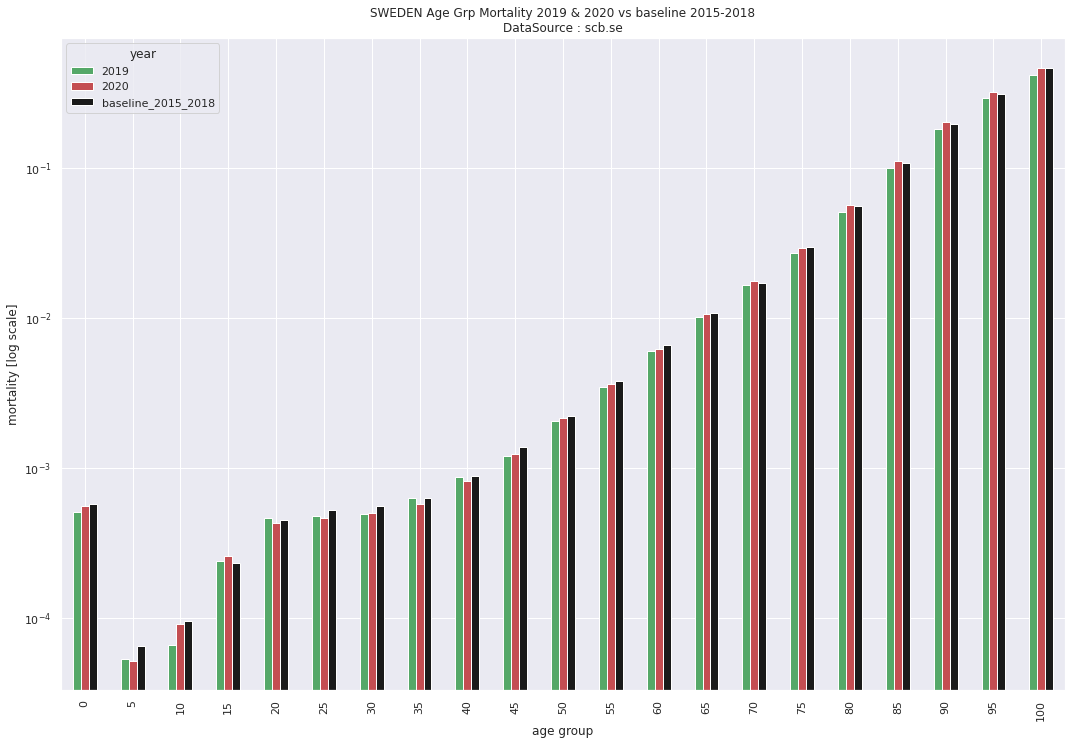

In [433]:
mort_5_cmp.plot(figsize=(18,12),kind='bar',color=['g','r','k'],title=title)
plt.yscale('log')
plt.ylabel('mortality [log scale]')
plt.xlabel('age group')
plt.savefig('SCB_FINAL_2020_age_grp_mort_cmp_log.jpg',format='jpg')


In [434]:
mort_5_cmp

year,2019,2020,baseline_2015_2018,over_base_20,under_base_19
bin_5,,,,,
0,0.000503,0.000553,0.000572,False,True
5,0.000053,0.000052,0.000065,False,True
10,0.000066,0.000090,0.000095,False,True
15,0.000238,0.000257,0.000231,True,False
20,0.000459,0.000425,0.000445,False,False
25,0.000473,0.000463,0.000518,False,True
30,0.000488,0.000496,0.000551,False,True
35,0.000626,0.000574,0.000626,False,False
40,0.000859,0.000814,0.000878,False,True


In [435]:
expected_5.sum(axis=1)

year
2002    75556.459899
2003    76332.939203
2004    77355.166397
2005    78561.254396
2006    79734.665217
2007    80578.286162
2008    81485.649382
2009    82447.720712
2010    83868.503006
2011    85047.924125
2012    85860.410238
2013    86880.845111
2014    88202.698786
2015    89515.335931
2016    90955.342808
2017    92146.640710
2018    93511.940893
2019    95505.679040
2020    96946.173718
dtype: float64

In [436]:
bin_5_dead_sums = binned_5_dead.unstack().sum(axis=1)
bin_5_dead_sums

year
1968    82464
1969    83338
1970    80016
1971    82734
1972    84056
1973    85640
1974    86316
1975    88208
1976    90677
1977    88200
1978    89681
1979    91074
1980    91797
1981    92034
1982    90670
1983    90790
1984    90482
1985    94032
1986    93295
1987    93306
1988    96738
1989    92109
1990    95161
1991    95200
1992    94710
1993    97007
1994    91844
1995    93955
1996    94133
1997    93326
1998    93271
1999    94726
2000    93461
2001    93752
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
dtype: int64

In [437]:
totals_expected_actuals = pd.concat([expected_5.sum(axis=1),bin_5_dead_sums],axis=1)
totals_expected_actuals.columns=['Expected_Deaths','Actual_Deaths']
totals_expected_actuals['excess'] = totals_expected_actuals['Actual_Deaths'] - totals_expected_actuals['Expected_Deaths']
totals_expected_actuals.dropna(inplace=True)
totals_expected_actuals

,Expected_Deaths,Actual_Deaths,excess
2002,75556.459899,95009,19452.540101
2003,76332.939203,92961,16628.060797
2004,77355.166397,90532,13176.833603
2005,78561.254396,91710,13148.745604
2006,79734.665217,91177,11442.334783
2007,80578.286162,91729,11150.713838
2008,81485.649382,91449,9963.350618
2009,82447.720712,90080,7632.279288
2010,83868.503006,90487,6618.496994
2011,85047.924125,89938,4890.075875


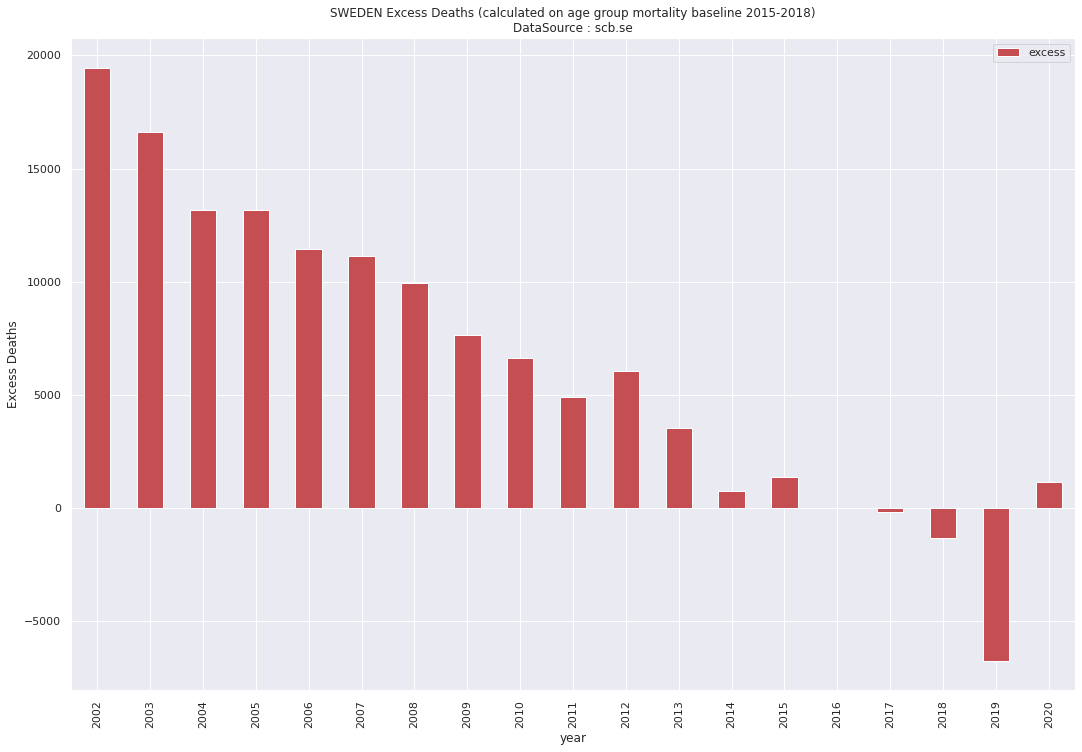

In [438]:
title='SWEDEN Excess Deaths (calculated on age group mortality baseline 2015-2018)\nDataSource : scb.se'
totals_expected_actuals.plot(kind='bar',figsize=(18,12),y='excess',color='r',title=title)
plt.ylabel('Excess Deaths')
plt.xlabel('year')
plt.savefig('SCB_FINAL_excess_deaths_bar.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

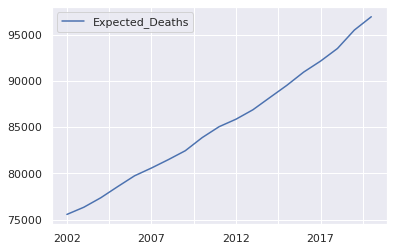

In [439]:
totals_expected_actuals.plot(y='Expected_Deaths')

In [440]:
import scipy.stats as sps

### linear regression for expected deaths 2002 - 2018 ###
x = totals_expected_actuals.index.values[:-2].astype(int)
y = totals_expected_actuals['Expected_Deaths'][:-2]
print (y)

slope,intercept,_,_,_ = sps.linregress(x,
                                       y)

print (slope,intercept)

2002    75556.459899
2003    76332.939203
2004    77355.166397
2005    78561.254396
2006    79734.665217
2007    80578.286162
2008    81485.649382
2009    82447.720712
2010    83868.503006
2011    85047.924125
2012    85860.410238
2013    86880.845111
2014    88202.698786
2015    89515.335931
2016    90955.342808
2017    92146.640710
2018    93511.940893
Name: Expected_Deaths, dtype: float64
1114.8057865217008 -2156757.1730865673


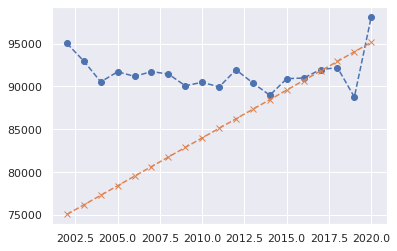

In [441]:
plt.plot(range(2002,2021),totals_expected_actuals['Actual_Deaths'],'o--')
X = range(2002,2021)
plt.plot(X,X*slope + intercept,'x--')

In [442]:
reg_expectation = X * slope + intercept

### excess deaths from linear regression ###
reg_excess = totals_expected_actuals['Actual_Deaths'] - reg_expectation
reg_excess

2002    19924.988470
2003    16762.182684
2004    13218.376897
2005    13281.571111
2006    11633.765324
2007    11070.959538
2008     9676.153751
2009     7192.347964
2010     6484.542178
2011     4820.736391
2012     5705.930605
2013     3055.124818
2014      514.319032
2015     1330.513245
2016      290.707459
2017      165.901672
2018     -735.904114
2019    -5269.709901
2020     2973.484313
Name: Actual_Deaths, dtype: float64

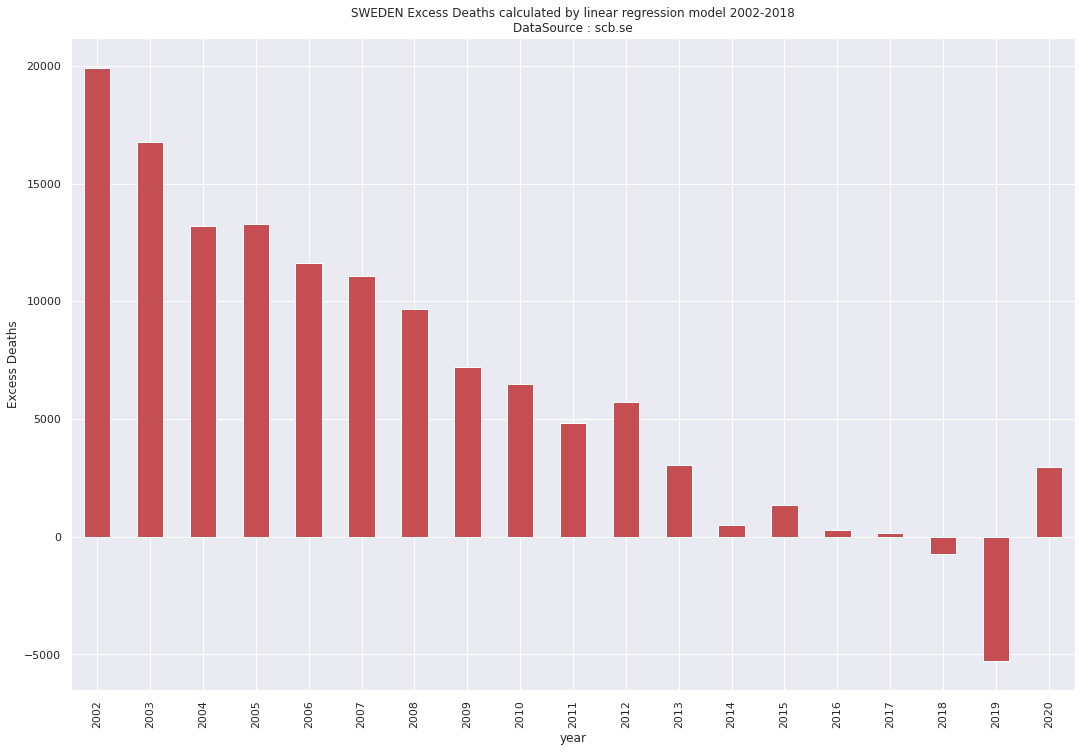

In [443]:
title = 'SWEDEN Excess Deaths calculated by linear regression model 2002-2018\nDataSource : scb.se'
reg_excess.plot(kind='bar',figsize=(18,12),color='r',title=title)
plt.ylabel('Excess Deaths')
plt.xlabel('year')
plt.savefig('SCB_FINAL_excess_bar_linreq.jpg',format='jpg')

In [444]:
mort_5_flat = mort_5.unstack()
mort_5_flat

bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
year,,,,,,,,,,,,,,,,,,,,,
2002,0.000852,0.000068,0.000108,0.000325,0.000531,0.000454,0.000558,0.000718,0.001207,0.001949,...,0.005313,0.008102,0.013936,0.023445,0.040667,0.070999,0.130200,0.219055,0.334341,0.456255
2003,0.000831,0.000090,0.000103,0.000335,0.000476,0.000481,0.000504,0.000742,0.001207,0.002000,...,0.005036,0.007966,0.013483,0.023178,0.039215,0.069794,0.124975,0.206449,0.325321,0.470274
2004,0.000769,0.000090,0.000104,0.000313,0.000548,0.000486,0.000480,0.000702,0.001088,0.001926,...,0.005096,0.007754,0.012886,0.022239,0.037312,0.067055,0.120301,0.199964,0.306209,0.427636
2005,0.000684,0.000105,0.000104,0.000256,0.000469,0.000499,0.000492,0.000709,0.001077,0.001831,...,0.005133,0.007696,0.013107,0.021692,0.037306,0.068328,0.116462,0.206967,0.304995,0.437801
2006,0.000738,0.000092,0.000093,0.000307,0.000496,0.000432,0.000504,0.000707,0.001056,0.001733,...,0.004927,0.007637,0.012336,0.021066,0.036310,0.066792,0.115367,0.202979,0.315491,0.446906
2007,0.000660,0.000086,0.000083,0.000321,0.000469,0.000497,0.000481,0.000681,0.001046,0.001791,...,0.004775,0.007575,0.012273,0.019866,0.035774,0.065920,0.117803,0.206288,0.321417,0.450063
2008,0.000634,0.000057,0.000114,0.000287,0.000471,0.000527,0.000546,0.000629,0.001067,0.001645,...,0.004680,0.007611,0.011938,0.019359,0.034707,0.064742,0.117191,0.205965,0.318635,0.451270
2009,0.000685,0.000093,0.000115,0.000271,0.000444,0.000465,0.000485,0.000689,0.001034,0.001636,...,0.004610,0.007366,0.011285,0.019233,0.033824,0.062530,0.115909,0.196675,0.312349,0.443558
2010,0.000661,0.000062,0.000090,0.000275,0.000450,0.000494,0.000504,0.000570,0.000920,0.001553,...,0.004423,0.007541,0.011227,0.018852,0.034382,0.061584,0.115375,0.192646,0.306449,0.466078


In [469]:
start_year = 2015
end_year = 2018


In [470]:


def age_grp_slope_intercept(s):

    return sps.linregress(np.arange(start_year,end_year + 1),s.loc[str(start_year) : str(end_year):])[:2]

slope_intercept = mort_5_flat.apply(age_grp_slope_intercept)
slope_intercept = slope_intercept.T
slope_intercept.columns = ['slope','intercept']
slope_intercept

,slope,intercept
bin_5,,
0,-2.908382e-05,0.059220
5,-6.322899e-06,0.012815
10,9.361255e-07,-0.001793
15,8.657255e-06,-0.017227
20,9.538703e-06,-0.018790
25,-7.838445e-06,0.016324
30,-4.995156e-06,0.010623
35,2.763750e-06,-0.004947
40,7.673111e-06,-0.014594


In [471]:
X = np.arange(2002,2021)
age_reg_mort = pd.DataFrame([X[i] * slope_intercept['slope'] + slope_intercept['intercept'] for i in range(len(X))])
age_reg_mort.index = np.arange(2002,2021).astype(str)
age_reg_mort

bin_5,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
2002,0.000994,0.000156,0.000081,0.000105,0.000306,0.000631,0.000623,0.000586,0.000767,0.001869,...,0.006085,0.008091,0.012013,0.016976,0.037759,0.071916,0.113959,0.211625,0.236449,0.451022
2003,0.000965,0.000150,0.000082,0.000114,0.000316,0.000623,0.000618,0.000588,0.000775,0.001834,...,0.005926,0.007983,0.011929,0.016982,0.037180,0.070810,0.113464,0.210415,0.241374,0.451910
2004,0.000936,0.000144,0.000083,0.000123,0.000326,0.000616,0.000613,0.000591,0.000782,0.001800,...,0.005768,0.007876,0.011845,0.016988,0.036601,0.069703,0.112970,0.209205,0.246298,0.452799
2005,0.000907,0.000137,0.000084,0.000131,0.000335,0.000608,0.000608,0.000594,0.000790,0.001765,...,0.005609,0.007768,0.011762,0.016995,0.036022,0.068596,0.112476,0.207995,0.251223,0.453687
2006,0.000878,0.000131,0.000085,0.000140,0.000345,0.000600,0.000603,0.000597,0.000798,0.001731,...,0.005450,0.007660,0.011678,0.017001,0.035443,0.067489,0.111981,0.206785,0.256147,0.454576
2007,0.000849,0.000125,0.000086,0.000149,0.000354,0.000592,0.000598,0.000599,0.000805,0.001696,...,0.005291,0.007552,0.011594,0.017007,0.034864,0.066382,0.111487,0.205575,0.261072,0.455464
2008,0.000820,0.000118,0.000087,0.000157,0.000364,0.000584,0.000593,0.000602,0.000813,0.001662,...,0.005132,0.007444,0.011511,0.017014,0.034285,0.065275,0.110993,0.204364,0.265997,0.456352
2009,0.000790,0.000112,0.000088,0.000166,0.000373,0.000576,0.000588,0.000605,0.000821,0.001627,...,0.004974,0.007336,0.011427,0.017020,0.033706,0.064168,0.110498,0.203154,0.270921,0.457241
2010,0.000761,0.000106,0.000089,0.000175,0.000383,0.000568,0.000583,0.000608,0.000829,0.001592,...,0.004815,0.007228,0.011343,0.017026,0.033127,0.063061,0.110004,0.201944,0.275846,0.458129
2011,0.000732,0.000099,0.000090,0.000183,0.000392,0.000561,0.000578,0.000611,0.000836,0.001558,...,0.004656,0.007121,0.011260,0.017033,0.032548,0.061955,0.109510,0.200734,0.280771,0.459018


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

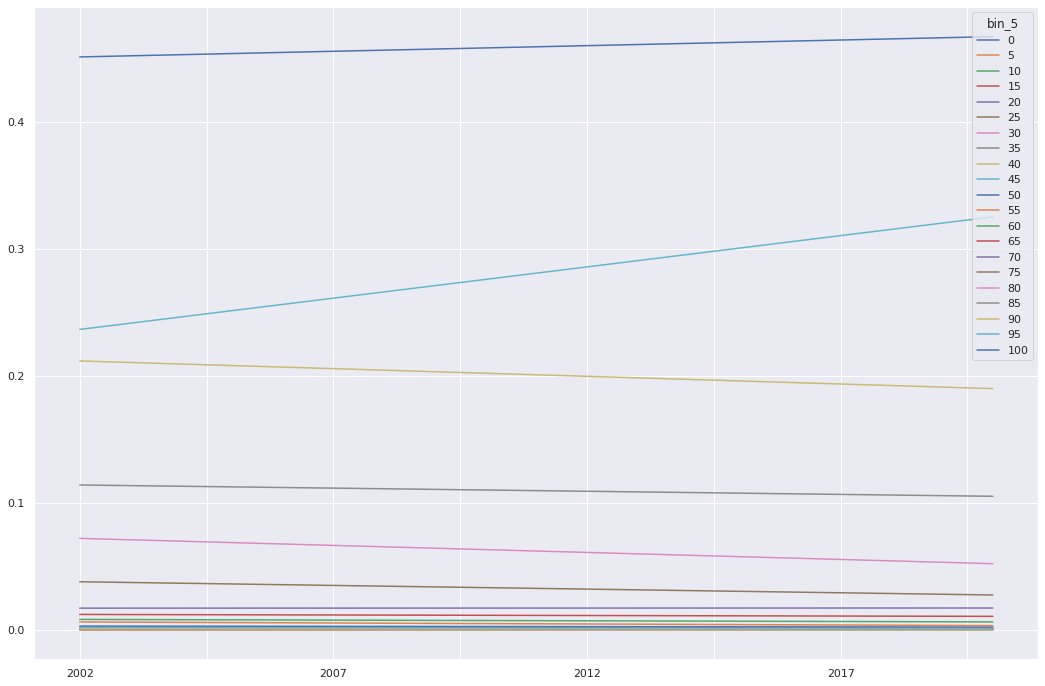

In [472]:
age_reg_mort.plot(figsize=(18,12))


In [473]:
age_reg_mort_expectation = (pop_5_flat * age_reg_mort).sum(axis=1)
age_reg_mort_expectation

year
2002    87129.131131
2003    87183.978938
2004    87426.349425
2005    87780.079224
2006    88122.305845
2007    88139.533481
2008    88228.256181
2009    88385.925602
2010    89051.739112
2011    89459.416828
2012    89486.077516
2013    89718.329339
2014    90243.405214
2015    90733.843631
2016    91364.227627
2017    91728.615206
2018    92221.622295
2019    93282.183970
2020    93729.578393
dtype: float64

In [474]:
age_reg_excess = (dead_5_flat.sum(axis=1) - age_reg_mort_expectation).dropna()
age_reg_excess

year
2002    7879.868869
2003    5777.021062
2004    3105.650575
2005    3929.920776
2006    3054.694155
2007    3589.466519
2008    3220.743819
2009    1694.074398
2010    1435.260888
2011     478.583172
2012    2451.922484
2013     683.670661
2014   -1267.405214
2015     173.156369
2016    -382.227627
2017     243.384794
2018     -36.622295
2019   -4516.183970
2020    4394.421607
dtype: float64

<AxesSubplot:xlabel='year'>

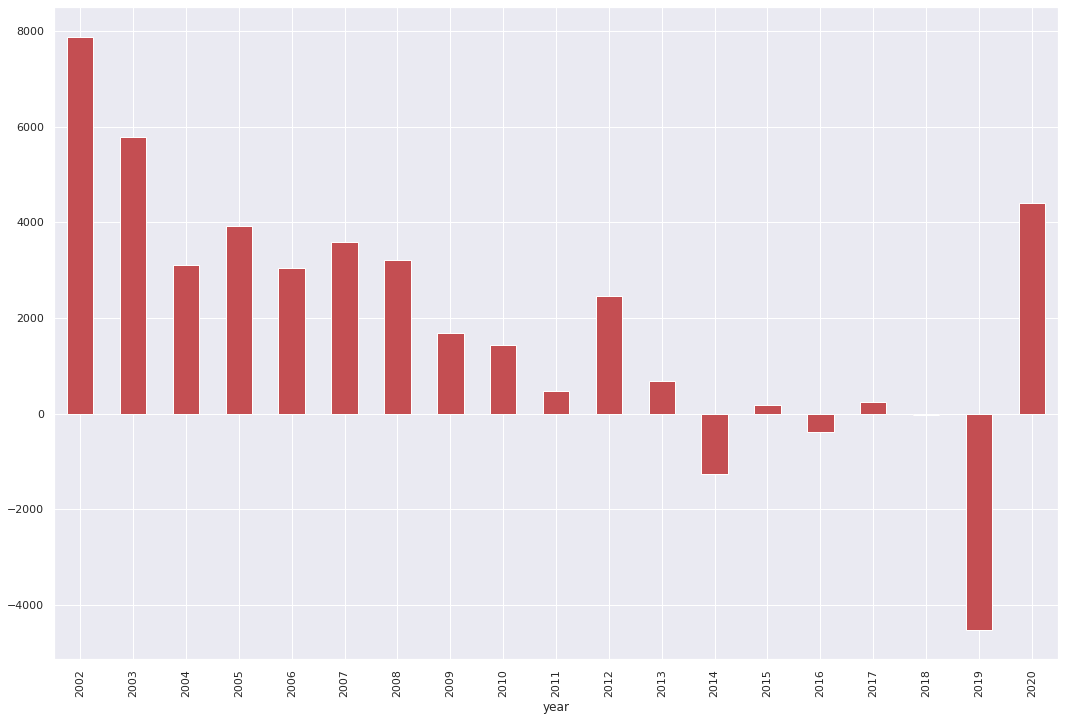

In [475]:
age_reg_excess.plot(figsize=(18,12),kind='bar',color='r')

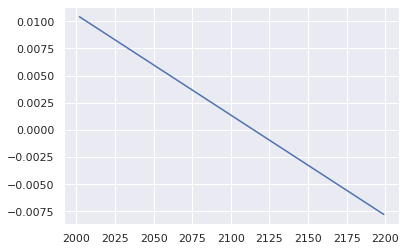

In [476]:
slope,intercept,_,_,_ = sps.linregress(mortality.loc[:'2018'].index.values.astype(int),
                                       mortality['count'][:-2])

X = np.arange(2002,2200)

reg_mortality = X * slope + intercept
plt.plot(X,reg_mortality)

In [477]:
abs_base_15_18 = dead_df.loc['2015' : '2018'].groupby('year')['count'].sum().mean()
abs_base_15_19 = dead_df.loc['2015' : '2019'].groupby('year')['count'].sum().mean()
print (abs_base_15_18)
abs_base_15_19

91511.5


90962.4

In [478]:
abs_dead_2020 = dead_df.loc['2020','count'].sum()
abs_dead_2020

98124

In [479]:
abs_dead_2020 / abs_base_15_19

1.0787314318883408

In [480]:
abs_dead_2020 / abs_base_15_18

1.0722586778710872

In [481]:
totals_expected_actuals['pct_excess'] = totals_expected_actuals['Actual_Deaths'] / totals_expected_actuals['Expected_Deaths'] 
totals_expected_actuals

,Expected_Deaths,Actual_Deaths,excess,pct_excess
2002,75556.459899,95009,19452.540101,1.257457
2003,76332.939203,92961,16628.060797,1.217836
2004,77355.166397,90532,13176.833603,1.170342
2005,78561.254396,91710,13148.745604,1.167369
2006,79734.665217,91177,11442.334783,1.143505
2007,80578.286162,91729,11150.713838,1.138384
2008,81485.649382,91449,9963.350618,1.122271
2009,82447.720712,90080,7632.279288,1.092571
2010,83868.503006,90487,6618.496994,1.078915
2011,85047.924125,89938,4890.075875,1.057498


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


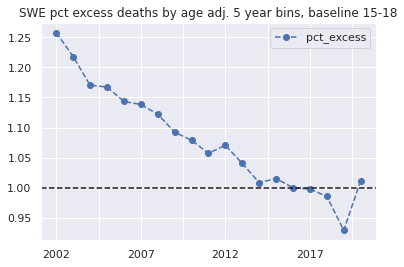

In [482]:
title = 'SWE pct excess deaths by age adj. 5 year bins, baseline 15-18'
totals_expected_actuals.plot(y='pct_excess',style='o--',title=title)
plt.axhline(1,ls='dashed',color='k')

In [483]:
totals_reg_expected_actuals = pd.concat([age_reg_mort_expectation,age_reg_excess],axis=1)
totals_reg_expected_actuals.columns = ['Expected','Excess']
totals_reg_expected_actuals['pct_excess'] = (totals_reg_expected_actuals['Expected'] +\
totals_reg_expected_actuals['Excess']) / totals_reg_expected_actuals['Expected']
totals_reg_expected_actuals

,Expected,Excess,pct_excess
year,,,
2002,87129.131131,7879.868869,1.090439
2003,87183.978938,5777.021062,1.066262
2004,87426.349425,3105.650575,1.035523
2005,87780.079224,3929.920776,1.044770
2006,88122.305845,3054.694155,1.034664
2007,88139.533481,3589.466519,1.040725
2008,88228.256181,3220.743819,1.036505
2009,88385.925602,1694.074398,1.019167
2010,89051.739112,1435.260888,1.016117


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


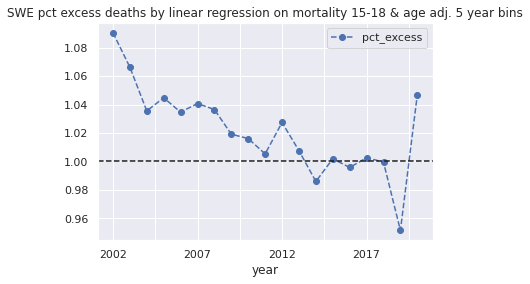

In [485]:
### baseline defined as 5 year bin mortality trend 2015-2018 # 
title = 'SWE pct excess deaths by linear regression on mortality 15-18 & age adj. 5 year bins'
totals_reg_expected_actuals.plot(y='pct_excess',style='o--',title=title)
plt.axhline(1,ls='dashed',color='k')